## Production Dashboarding ##
panel serve PHNX_prod_analytics.ipynb --session-token-expiration 600 <br>
kill -9 $(lsof -ti:5006) <br>
* https://docs.google.com/document/d/1PU1OUlR6i1fGRnLsv8iYXmmY_byGu2kccWzCMyY922o/edit

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import panel as pn
import pickle
import numpy as np
cwd = os.getcwd()
slash_idx = [i for i,l in enumerate(cwd) if l=='/']
repo_dir = cwd[:slash_idx[-2]]
sys.path.append(repo_dir)
from analysis.analysis_pipeline import AnalysisPipeline
from utils.lims_utils import get_plate_runs, plates_from_exp, plates_from_workflow
from utils.s3_interface import download_from_s3, upload_to_s3, s3_imgupload, s3_df2csv, s3_csv2df
from utils.table_properties import * 
pd.set_option('display.max_columns', None)
s3_model_bucket = 'ml-analytics-file-store'
s3_model_bucket_subdirectory = 'exerevnetes-preprocessing-models/'

pn.extension(sizing_mode="stretch_width")
overall_analytics_panel = []
variant_analytics_panel = []
top_variant_reps = []
top_variant_analytics_panel = []
figure_panel = []
plate_analytics_panel = []
library_analytics_panel = []
unit_analytics_panel = []

top_variant_stats, top_variant_reps = None, None

# Get data from table

In [3]:
project_subfolder = 'Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/' 
exp_workflow = ['WF10125','WF10128','WF10130','WF10132', 'WF10134', 'WF10136', 'WF10139', 'WF10144', 'WF10149', 'WF10157', 'WF10158', 'WF10163', 'WF10169', 'WF10173', 'WF10181']  # None # 
table = 'combi_analytics_table' 
metric_dict = {'LcmsC18':['pellet_OD', 'measured_nonbinary_sum_(r)','measured_nonbinary_score_(r)', 'measured_conversion_(r)'], 'LcmsChiral':['measured_enantiomeric_excess_(+over-)']}
analysis_pipeline = AnalysisPipeline(s3_subfolder=project_subfolder, neg_ctrltype='EV', sort_by=None, metric_dict=metric_dict, get_dashboard_panel=False)
df = analysis_pipeline.load_data(table, exp_workflow=exp_workflow)

executing query: SELECT "id", "exp_workflow_barcode", "exp_workflow_name", "proj_barcode", "proj_name", "maldi_run", "lcms_C18_run", "lcms_chiral_run", "maldi_plate_(r)", "maldi_address_(r)", "lcms_plate_(r)", "lcms_address_(r)", "source_plate_(r)", "source_address_(r)", "maldi_plate_(+)", "maldi_address_(+)", "lcms_plate_(+)", "lcms_address_(+)", "source_plate_(+)", "source_address_(+)", "maldi_plate_(-)", "maldi_address_(-)", "lcms_plate_(-)", "lcms_address_(-)", "source_plate_(-)", "source_address_(-)", "ctrl_type", "exp_condition", "enzyme_barcode", "sequence", "mutations", "hamming", "reference_enzyme", "substrate_barcode_(r)", "substrate_barcode_(+)", "substrate_barcode_(-)", "substrate_smiles_(r)", "substrate_smiles_(+)", "substrate_smiles_(-)", "substrate_concentration_(r)", "substrate_concentration_(+)", "substrate_concentration_(-)", "predicted_binary_score_(r)", "predicted_nonbinary_score_(r)", "measured_nonbinary_score_(r)", "measured_nonbinary_sum_(r)", "measured_conversio

# Get Analytics from data

******************************
Computing Overall Analytics...
******************************
LcmsC18 ['pellet_OD', 'measured_nonbinary_sum_(r)', 'measured_nonbinary_score_(r)', 'measured_conversion_(r)']
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_pellet_OD_ctrl_type.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_nonbinary_sum_(r)_ctrl_type.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_nonbinary_score_(r)_ctrl_type.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_conversion_(r)_ctrl_type.png to S3.
LcmsChiral ['measured_enantiomeric_excess_(+over-)']
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_enantiomeric_excess_(+over-)_ctrl_type.png to S3.


ctrl_type    n_var  n_LcmsC18  n_LcmsChiral  \
all EV ctrls                   all EV ctrls      NaN    560.000       512.000   
all pos ctrls                 all pos ctrls      NaN    452.000       354.000   
all exp ctrls (by ctrl_type)            NaN 5605.000  15442.000      4729.000   
0                                       exp 5605.000  15442.000      4729.000   

                              pellet_OD_max_FIOP  pellet_OD_median_FIOP  \
all EV ctrls                                 NaN                    NaN   
all pos ctrls                                NaN                    NaN   
all exp ctrls (by ctrl_type)               1.877                  1.034   
0                                          1.877                  1.034   

                              pellet_OD_median  pellet_OD_mean  pellet_OD_max  \
all EV ctrls                             0.050           0.985          3.030   
all pos ctrls                            2.377           1.918          3.013   
all exp ctrls (by ctrl_type)             2.457           2.376          4.462   
0                                        2.457           2.376          4.462   

                              pellet_OD_min  pellet_OD_cv  pellet_OD_std  \
all EV ctrls                          0.050         1.196          1.178   
all pos ctrls                         0.050         0.520          0.997   
all exp ctrls (by ctrl_type)          0.050         0.286          0.678   
0                                     0.050         0.286          0.678   

                              pellet_OD_iqr  pellet_OD_iqr_norm  \
all EV ctrls                          2.374              47.489   
all pos ctrls                         0.892               0.375   
all exp ctrls (by ctrl_type)          0.565               0.230   
0                                     0.565               0.230   

                              pellet_OD_range  pellet_OD_range_norm  \
all EV ctrls                            2.980                59.606   
all pos ctrls                           2.963                 1.247   
all exp ctrls (by ctrl_type)            4.412                 1.796   
0                                       4.412                 1.796   

                              measured_nonbinary_sum_(r)_max_FIOP  \
all EV ctrls                                                  NaN   
all pos ctrls                                                 NaN   
all exp ctrls (by ctrl_type)                                7.839   
0                                                           7.839   

                              measured_nonbinary_sum_(r)_median_FIOP  \
all EV ctrls                                                     NaN   
all pos ctrls                                                    NaN   
all exp ctrls (by ctrl_type)                                   1.047   
0                                                              1.047   

                              measured_nonbinary_sum_(r)_median  \
all EV ctrls                                            112.343   
all pos ctrls                                           110.449   
all exp ctrls (by ctrl_type)                            115.674   
0                                                       115.674   

                              measured_nonbinary_sum_(r)_mean  \
all EV ctrls                                          134.057   
all pos ctrls                                         137.606   
all exp ctrls (by ctrl_type)                          140.288   
0                                                     140.288   

                              measured_nonbinary_sum_(r)_max  \
all EV ctrls                                         340.679   
all pos ctrls                                       1061.253   
all exp ctrls (by ctrl_type)                         865.863   
0                                                    865.863   

                              measured_nonbinary_sum_(r)_min  \
all EV ctrls       

Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/ctrl_type_METRICS.csv to S3.
Obtained overall analytics metrics. 

******************************
Computing Variant Analytics...
******************************
LcmsC18 ['pellet_OD', 'measured_nonbinary_sum_(r)', 'measured_nonbinary_score_(r)', 'measured_conversion_(r)']
LcmsChiral ['measured_enantiomeric_excess_(+over-)']


enzyme_barcode                mutations  \
all EV ctrls                        all EV ctrls             all EV ctrls   
all pos ctrls                      all pos ctrls            all pos ctrls   
all exp ctrls (by enzyme_barcode)            NaN                      NaN   
0                                       ENZ36038  A129S_V152A_S309L_L403T   
1                                       ENZ35996  A129S_V152A_F180M_L403T   
...                                          ...                      ...   
5992                                     enzx8y1                     None   
5993                                    enzx8y15                     None   
5994                                     enzx8y2                     None   
5995                                    enzx9y16                     None   
5996                                     enzx9y2                     None   

                                                library_ref  \
all EV ctrls                                   all EV ctrls   
all pos ctrls                                 all pos ctrls   
all exp ctrls (by enzyme_barcode)                       NaN   
0                                  PaAmi_Darwin_BLD10022_C1   
1                                  PaAmi_Darwin_BLD10022_C1   
...                                                     ...   
5992                                                   None   
5993                                                   None   
5994                                                   None   
5995                                                   None   
5996                                                   None   

                                  substrate_concentration_(r)  \
all EV ctrls                                     all EV ctrls   
all pos ctrls                                   all pos ctrls   
all exp ctrls (by enzyme_barcode)                     186.601   
0                                                     350.000   
1                                                     350.000   
...                                                       ...   
5992                                                  350.000   
5993                                                  350.000   
5994                                                  350.000   
5995                                                  140.000   
5996                                                  350.000   

                                  exp_workflow_barcode lcms_plate_(r)  \
all EV ctrls                              all EV ctrls   all EV ctrls   
all pos ctrls                            all pos ctrls  all pos ctrls   
all exp ctrls (by enzyme_barcode)                  NaN            NaN   
0                                              WF10173       PLT18089   
1                                              WF10173       PLT18089   
...                                                ...            ...   
5992                                           WF10173       PLT17655   
5993                                           WF10173       PLT17656   
5994                                           WF10173       PLT17655   
5995                                           WF10149       PLT17641   
5996                                           WF10173       PLT17655   

                                  lcms_address_(r)  n_LcmsC18  n_LcmsChiral  \
all EV ctrls                          all EV ctrls    560.000       512.000   
all pos ctrls                        all pos ctrls    452.000       354.000   
all exp ctrls (by enzyme_barcode)              NaN      2.246         0.725   
0                                            X11Y2      2.000         2.000   
1                                            X13Y2      8.000         8.000   
...                                            ...        ...           ...   
5992                                          X8Y1      0.000         0.000   
5993                                         X8Y15      0.000 

Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/enzyme_METRICS.csv to S3.
Obtained variant analytics metrics. 

**********************************
Computing Top Variant Analytics...
**********************************
Top variant stats (n=100)


enzyme_barcode                mutations  \
0        ENZ36038  A129S_V152A_S309L_L403T   
1        ENZ35996  A129S_V152A_F180M_L403T   
2        ENZ35998  A129S_V152A_S309A_L403T   
3        ENZ36021  A129S_V152A_F180I_L403T   
4        ENZ36036  A129S_V152A_S309F_L403T   
..            ...                      ...   
95       ENZ35946              A129S_K264E   
96       ENZ11855                    S309Y   
97       ENZ36013  S128G_V152A_L335V_L403T   
98       ENZ11345                     L15I   
99       ENZ11522                    S309M   

                             library_ref substrate_concentration_(r)  \
0               PaAmi_Darwin_BLD10022_C1                     350.000   
1               PaAmi_Darwin_BLD10022_C1                     350.000   
2               PaAmi_Darwin_BLD10022_C1                     350.000   
3               PaAmi_Darwin_BLD10022_C2                     350.000   
4               PaAmi_Darwin_BLD10022_C1                     350.000   
..                                   ...                         ...   
95                        PaAmi_EP_Lib_9                     350.000   
96  Colony Plate - Twist SS - H6 - AA309                     140.000   
97              PaAmi_Darwin_BLD10022_A2                     350.000   
98  Colony Plate - Twist SS - A1 - AA 15                     140.000   
99  Colony Plate - Twist SS - H6 - AA309                     140.000   

   exp_workflow_barcode lcms_plate_(r) lcms_address_(r)  n_LcmsC18  \
0               WF10173       PLT18089            X11Y2      2.000   
1               WF10173       PLT18089            X13Y2      8.000   
2               WF10173       PLT18089            X10Y1      3.000   
3               WF10173       PLT18089            X11Y9      2.000   
4               WF10173       PLT18089            X23Y2      2.000   
..                  ...            ...              ...        ...   
95              WF10173       PLT17655           X13Y12      2.000   
96              WF10132       PLT17377             X4Y2      1.000   
97              WF10173       PLT18089            X21Y7      4.000   
98              WF10132       PLT17381           X10Y12      2.000   
99              WF10132       PLT17377             X5Y5      1.000   

    n_LcmsChiral  pellet_OD_median_POS  pellet_OD_mean_POS  pellet_OD_cv_POS  \
0          2.000                   NaN                 NaN               NaN   
1          8.000                   NaN                 NaN               NaN   
2          3.000                   NaN                 NaN               NaN   
3          2.000                   NaN                 NaN               NaN   
4          2.000                   NaN                 NaN               NaN   
..           ...                   ...                 ...               ...   
95         2.000                   NaN                 NaN               NaN   
96         1.000                   NaN                 NaN               NaN   
97         4.000                   NaN                 NaN               NaN   
98         2.000                   NaN                 NaN               NaN   
99         1.000                   NaN                 NaN               NaN   

    pellet_OD_std_POS  pellet_OD_iqr_POS  pellet_OD_max_FIOP  \
0                 NaN                NaN               1.332   
1                 NaN                NaN               1.341   
2                 NaN                NaN               1.237   
3                 NaN                NaN               1.367   
4                 NaN                NaN               1.315   
..                ...                ...                 ...   
95                NaN                NaN               1.211   
96                NaN                NaN               1.086   
97                NaN                NaN               1.331   
98                NaN                NaN               1.040   
99                NaN                NaN               1.072   

    pellet_OD_

Top variant detections data


id exp_workflow_barcode  \
0     WF10173_PLT18089_X12Y2              WF10173   
1     WF10173_PLT18089_X11Y2              WF10173   
2     WF10173_PLT18089_X14Y2              WF10173   
3      WF10173_PLT18089_X5Y2              WF10173   
4     WF10173_PLT18089_X13Y2              WF10173   
..                       ...                  ...   
447   WF10173_PLT18089_X22Y7              WF10173   
448   WF10173_PLT18089_X21Y7              WF10173   
449  WF10132_PLT17381_X10Y12              WF10132   
450   WF10132_PLT17381_X11Y7              WF10132   
451    WF10132_PLT17377_X5Y5              WF10132   

                 exp_workflow_name proj_barcode proj_name maldi_run  \
0           PHNX Unit 15 Screening     PRJ10007   Phoenix      None   
1           PHNX Unit 15 Screening     PRJ10007   Phoenix      None   
2           PHNX Unit 15 Screening     PRJ10007   Phoenix      None   
3           PHNX Unit 15 Screening     PRJ10007   Phoenix      None   
4           PHNX Unit 15 Screening     PRJ10007   Phoenix      None   
..                             ...          ...       ...       ...   
447         PHNX Unit 15 Screening     PRJ10007   Phoenix      None   
448         PHNX Unit 15 Screening     PRJ10007   Phoenix      None   
449  PHNX Unit 6 - PaAmi Screening     PRJ10007   Phoenix      None   
450  PHNX Unit 6 - PaAmi Screening     PRJ10007   Phoenix      None   
451  PHNX Unit 6 - PaAmi Screening     PRJ10007   Phoenix      None   

    lcms_C18_run lcms_chiral_run maldi_plate_(r) maldi_address_(r)  \
0    WF10173_C18  WF10173_chiral            None              None   
1    WF10173_C18  WF10173_chiral            None              None   
2    WF10173_C18  WF10173_chiral            None              None   
3    WF10173_C18  WF10173_chiral            None              None   
4    WF10173_C18  WF10173_chiral            None              None   
..           ...             ...             ...               ...   
447  WF10173_C18  WF10173_chiral            None              None   
448  WF10173_C18  WF10173_chiral            None              None   
449  WF10132_C18  WF10132_chiral            None              None   
450  WF10132_C18  WF10132_chiral            None              None   
451  WF10132_C18  WF10132_chiral            None              None   

    lcms_plate_(r) lcms_address_(r) source_plate_(r) source_address_(r)  \
0         PLT18089            X12Y2         PLT17606              X12Y2   
1         PLT18089            X11Y2         PLT17606              X11Y2   
2         PLT18089            X14Y2         PLT17606              X14Y2   
3         PLT18089             X5Y2         PLT17606               X5Y2   
4         PLT18089            X13Y2         PLT17606              X13Y2   
..             ...              ...              ...                ...   
447       PLT18089            X22Y7         PLT17606              X22Y7   
448       PLT18089            X21Y7         PLT17606              X21Y7   
449       PLT17381           X10Y12         PLT17462             X10Y12   
450       PLT17381            X11Y7         PLT17462              X11Y7   
451       PLT17377             X5Y5         PLT17458               X5Y5   

    maldi_plate_(+) maldi_address_(+) lcms_plate_(+) lcms_address_(+)  \
0              None              None           None             None   
1              None              None           None             None   
2              None              None           None             None   
3              None              None           None             None   
4              None              None           None             None   
..              ...               ...            ...              ...   
447            None              None           None             None   
448            None              None           None             None   
449            None              None           None             None   
450            None              None           None            

Obtained top variant analytics metrics. 

******************************
Computing Library Analytics...
******************************
LcmsC18 ['pellet_OD', 'measured_nonbinary_sum_(r)', 'measured_nonbinary_score_(r)', 'measured_conversion_(r)']
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_pellet_OD_library.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_nonbinary_sum_(r)_library.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_nonbinary_score_(r)_library.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_conversion_(r)_library.png to S3.
LcmsChiral ['measured_enantiomeric_excess_(+over-)']
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_enantiomeric_excess_(+over-)_library.png to S3.


library_ref  \
all EV ctrls                                            all EV ctrls   
all pos ctrls                                          all pos ctrls   
all exp ctrls (by library_ref)                                   NaN   
0                               Colony Plate - Twist SS - A1 - AA 15   
1                               Colony Plate - Twist SS - A2 - AA 92   
...                                                              ...   
212                                                SEED_PLATE_Twist2   
213                                                   SEED_PLATE_new   
214                                                       Seed_Plate   
215                                   Twist Genes for Unit 12 (PHNX)   
216                                Visp Pa-Ami variant seed plate_96   

                                                     library_barcode  \
all EV ctrls                                            all EV ctrls   
all pos ctrls                                          all pos ctrls   
all exp ctrls (by library_ref)                                   NaN   
0                               Colony Plate - Twist SS - A1 - AA 15   
1                               Colony Plate - Twist SS - A2 - AA 92   
...                                                              ...   
212                                                SEED_PLATE_Twist2   
213                                                   SEED_PLATE_new   
214                                                       Seed_Plate   
215                                   Twist Genes for Unit 12 (PHNX)   
216                                Visp Pa-Ami variant seed plate_96   

                               exp_workflow_barcode  n_var  n_LcmsC18  \
all EV ctrls                           all EV ctrls    NaN    564.000   
all pos ctrls                         all pos ctrls    NaN    488.000   
all exp ctrls (by library_ref)                  NaN 29.539     70.977   
0                                           WF10132 18.000     22.000   
1                                           WF10132 23.000     28.000   
...                                             ...    ...        ...   
212                                         WF10169  0.000     48.000   
213                                         WF10132  0.000      1.000   
214                                         WF10128  9.000     72.000   
215                                         WF10158 79.000    316.000   
216                                         WF10134  6.000      0.000   

                                n_LcmsChiral  pellet_OD_max_FIOP  \
all EV ctrls                         444.000                 NaN   
all pos ctrls                        301.000                 NaN   
all exp ctrls (by library_ref)        22.037               1.265   
0                                     22.000               1.428   
1                                      6.000               1.191   
...                                      ...                 ...   
212                                   48.000               0.021   
213                                    1.000               0.021   
214                                    0.000                 NaN   
215                                   12.000               1.454   
216                                   24.000               1.388   

                                pellet_OD_median_FIOP  pellet_OD_median  \
all EV ctrls                                      NaN             0.050   
all pos ctrls                                     NaN             2.368   
all exp ctrls (by library_ref)                  1.041             2.464   
0                                               0.978             2.317   
1                                               0.996             2.357   
...                                               ...               ...   
212                                             0.021             0.050   
213                              

Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/library_METRICS.csv to S3.
Obtained library analytics metrics. 

****************************
Computing Plate Analytics...
****************************
LcmsC18 ['pellet_OD', 'measured_nonbinary_sum_(r)', 'measured_nonbinary_score_(r)', 'measured_conversion_(r)']
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_pellet_OD_lcms_plate_(r).png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_nonbinary_sum_(r)_lcms_plate_(r).png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_nonbinary_score_(r)_lcms_plate_(r).png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_conversion_(r)_lcms_plate_(r).png to S3.
LcmsChiral ['measured_enantiomeric_excess_(+over-)']
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_enantiomeric_excess_(+over-

lcms_plate_(r) exp_workflow_barcode  \
all EV ctrls                        all EV ctrls         all EV ctrls   
all pos ctrls                      all pos ctrls        all pos ctrls   
all exp ctrls (by lcms_plate_(r))            NaN                  NaN   
0                                       PLT17286              WF10125   
1                                       PLT17289              WF10125   
2                                       PLT17292              WF10125   
3                                       PLT17294              WF10125   
4                                       PLT17352              WF10128   
5                                       PLT17355              WF10128   
6                                       PLT17358              WF10130   
7                                       PLT17360              WF10130   
8                                       PLT17365              WF10130   
9                                       PLT17368              WF10130   
10                                      PLT17375              WF10134   
11                                      PLT17376              WF10132   
12                                      PLT17377              WF10132   
13                                      PLT17378              WF10132   
14                                      PLT17381              WF10132   
15                                      PLT17623              WF10136   
16                                      PLT17624              WF10136   
17                                      PLT17625              WF10136   
18                                      PLT17626              WF10136   
19                                      PLT17627              WF10139   
20                                      PLT17628              WF10139   
21                                      PLT17629              WF10139   
22                                      PLT17630              WF10139   
23                                      PLT17631              WF10144   
24                                      PLT17632              WF10144   
25                                      PLT17634              WF10144   
26                                      PLT17635              WF10144   
27                                      PLT17638              WF10149   
28                                      PLT17639              WF10149   
29                                      PLT17640              WF10149   
30                                      PLT17641              WF10149   
31                                      PLT17643              WF10157   
32                                      PLT17644              WF10157   
33                                      PLT17645              WF10157   
34                                      PLT17646              WF10157   
35                                      PLT17647              WF10158   
36                                      PLT17648              WF10158   
37                                      PLT17649              WF10158   
38                                      PLT17655              WF10173   
39                                      PLT17656              WF10173   
40                                      PLT18080              WF10169   
41                                      PLT18087              WF10163   
42                                      PLT18088              WF10163   
43                                      PLT18089              WF10173   
44                                      PLT18094              WF10169   
45                                      PLT18095              WF10169   
46                                      PLT18466              WF10181   
47                                      PLT18467              WF10181   
48                                      PLT18468              WF10181   
49                                      PLT18469              WF10181   

                                  substrate_concentration_(r)   n_var  \
all EV ctrls      

Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/plate_METRICS.csv to S3.
Obtained plate analytics metrics. 

***************************
Computing Unit Analytics...
***************************
LcmsC18 ['pellet_OD', 'measured_nonbinary_sum_(r)', 'measured_nonbinary_score_(r)', 'measured_conversion_(r)']
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_pellet_OD_exp_workflow_barcode.png to S3.


/Users/charmaine/Documents/projects/ml-preprocessing/utils/visualization_utils.py:264: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(max(4,0.5*grp_len),6))


Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_nonbinary_sum_(r)_exp_workflow_barcode.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_nonbinary_score_(r)_exp_workflow_barcode.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_conversion_(r)_exp_workflow_barcode.png to S3.
LcmsChiral ['measured_enantiomeric_excess_(+over-)']
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_measured_enantiomeric_excess_(+over-)_exp_workflow_barcode.png to S3.


exp_workflow_barcode   n_var  \
all EV ctrls                                    all EV ctrls     NaN   
all pos ctrls                                  all pos ctrls     NaN   
all exp ctrls (by exp_workflow_barcode)                  NaN 413.133   
0                                                    WF10125 785.000   
1                                                    WF10128 228.000   
2                                                    WF10130 800.000   
3                                                    WF10132 756.000   
4                                                    WF10134   7.000   
5                                                    WF10136 674.000   
6                                                    WF10139 754.000   
7                                                    WF10144 276.000   
8                                                    WF10149 141.000   
9                                                    WF10157 512.000   
10                                                   WF10158 324.000   
11                                                   WF10163 187.000   
12                                                   WF10169 209.000   
13                                                   WF10173 172.000   
14                                                   WF10181 372.000   

                                         n_LcmsC18  n_LcmsChiral  \
all EV ctrls                               220.000       216.000   
all pos ctrls                              219.000       216.000   
all exp ctrls (by exp_workflow_barcode)   1029.467       315.267   
0                                         1399.000        19.000   
1                                          698.000         0.000   
2                                         1400.000         0.000   
3                                         1324.000       477.000   
4                                            0.000        28.000   
5                                         1390.000        60.000   
6                                         1376.000       305.000   
7                                          600.000       600.000   
8                                          586.000         0.000   
9                                         1408.000       600.000   
10                                        1011.000       600.000   
11                                         651.000       300.000   
12                                        1287.000       531.000   
13                                         904.000       609.000   
14                                        1408.000       600.000   

                                         pellet_OD_median_EV  \
all EV ctrls                                             NaN   
all pos ctrls                                            NaN   
all exp ctrls (by exp_workflow_barcode)                1.277   
0                                                        NaN   
1                                                        NaN   
2                                                      2.301   
3                                                      2.393   
4                                                        NaN   
5                                                      0.050   
6                                                      2.137   
7                                                      0.050   
8                                                      2.318   
9                                                      1.615   
10                                                     2.533   
11                                                     0.050   
12                                                     0.050   
13                                                     0.050   
14                                                     1.780   

                                         pellet_OD_mean_EV  pellet_OD_cv_EV  \
all EV ctrls                                           NaN              NaN   
all

Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/unit_METRICS.csv to S3.
Obtained unit analytics metrics. 



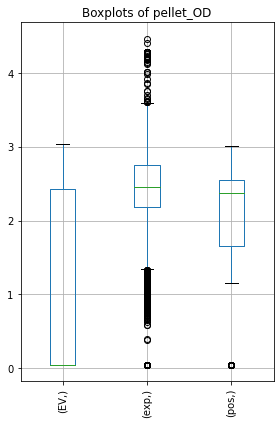

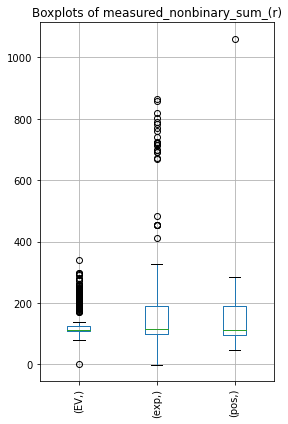

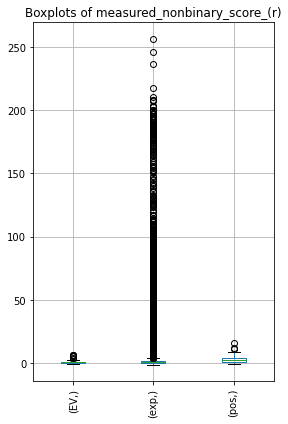

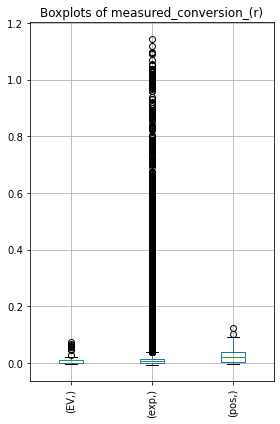

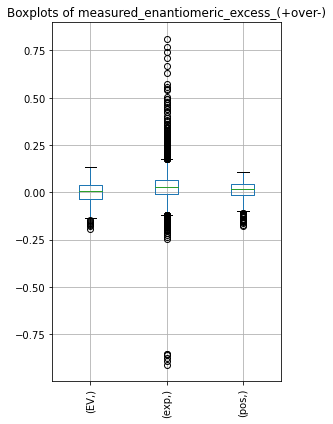

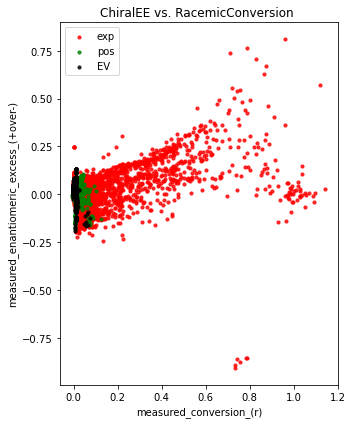

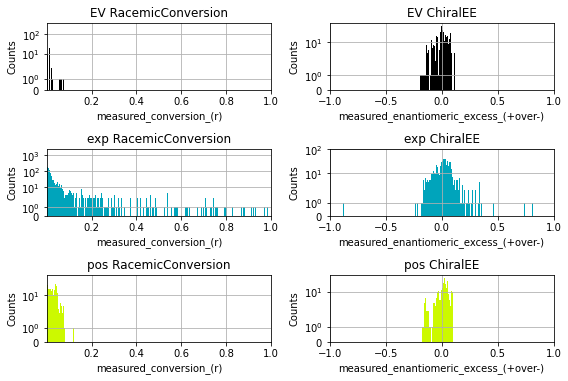

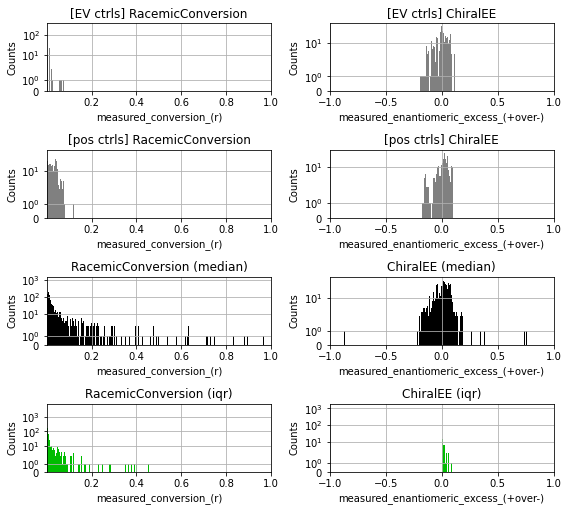

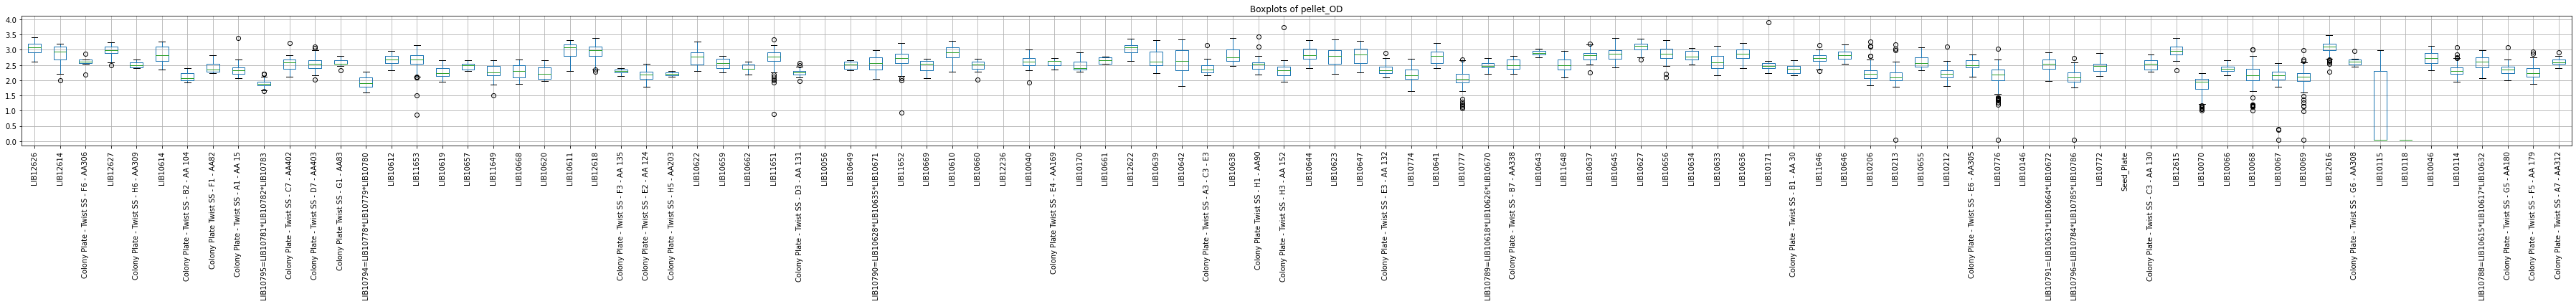

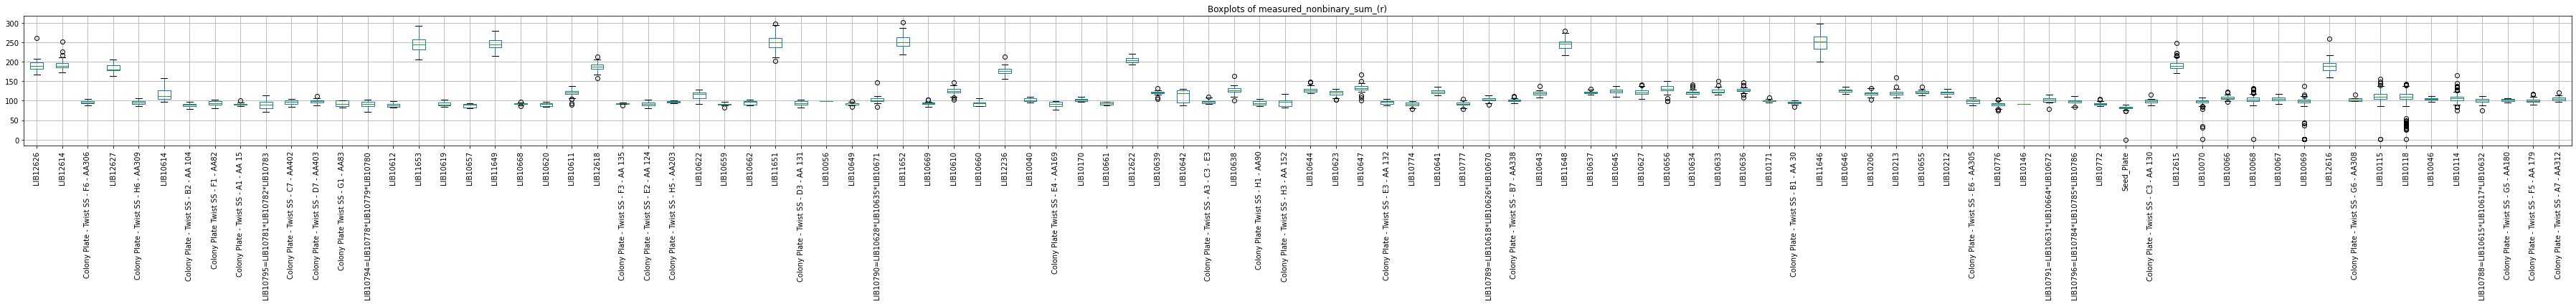

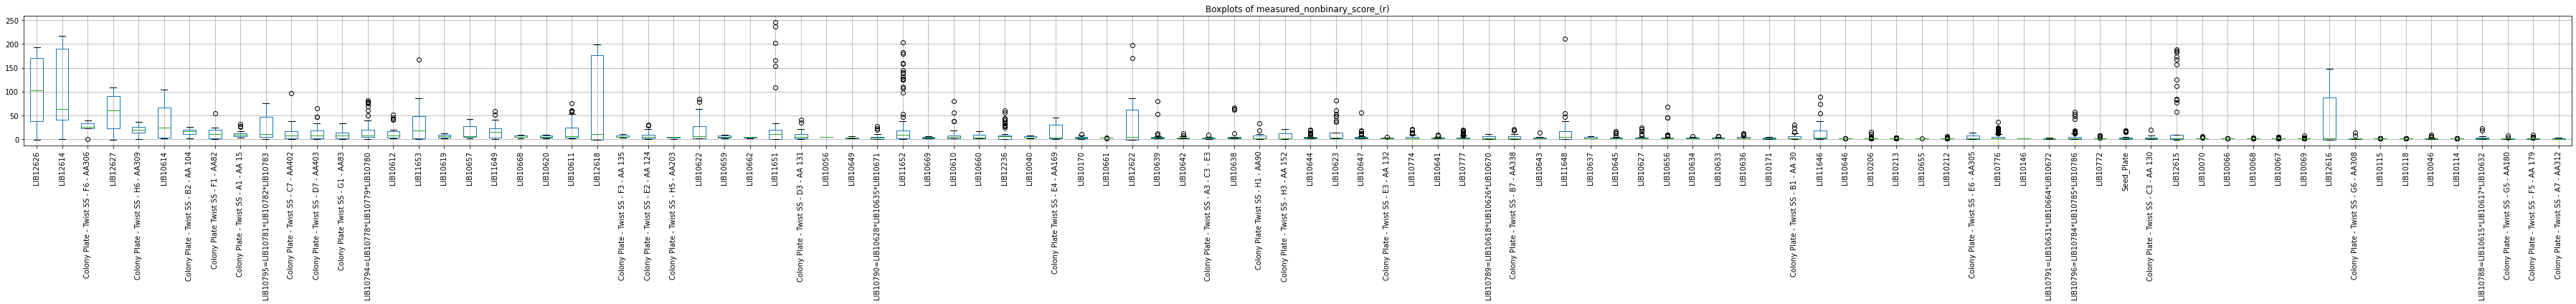

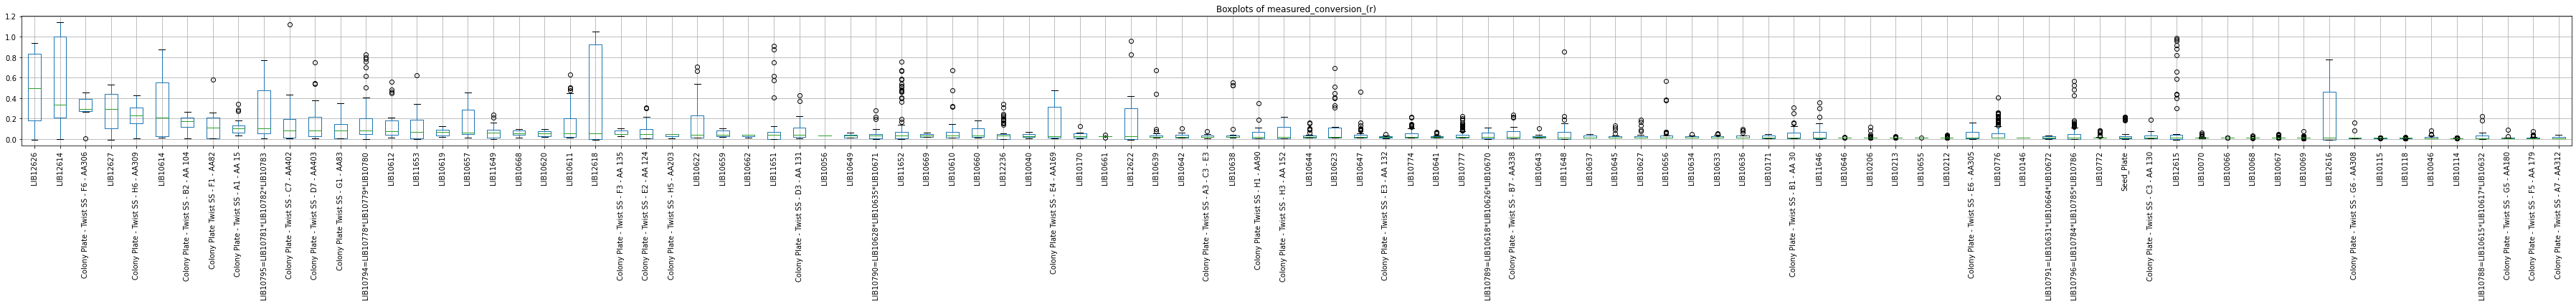

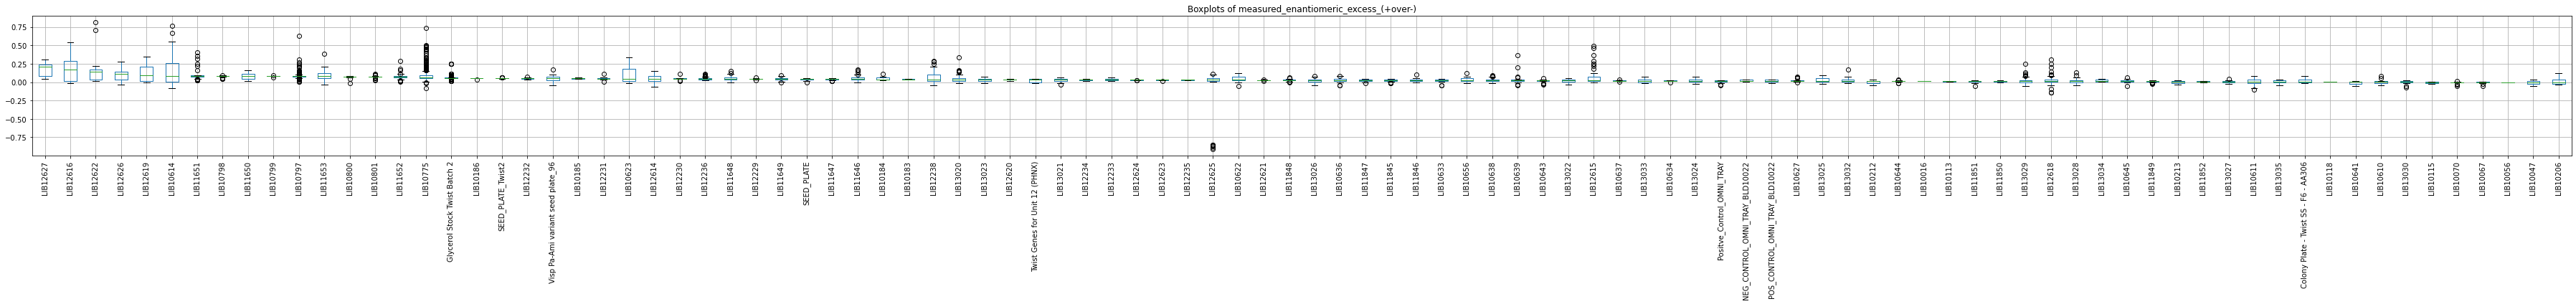

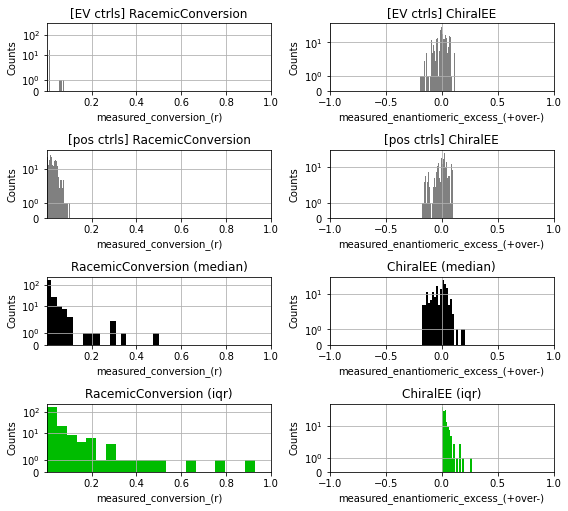

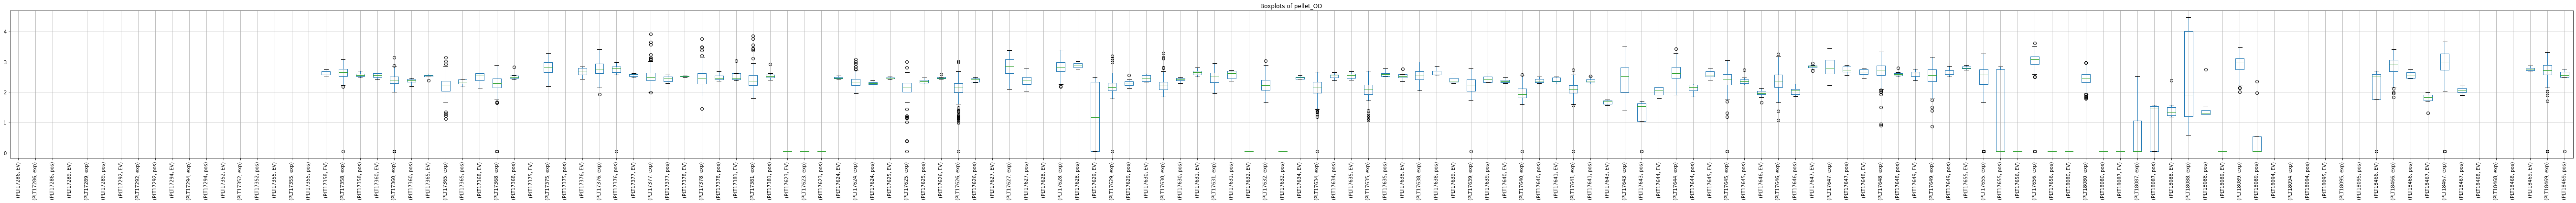

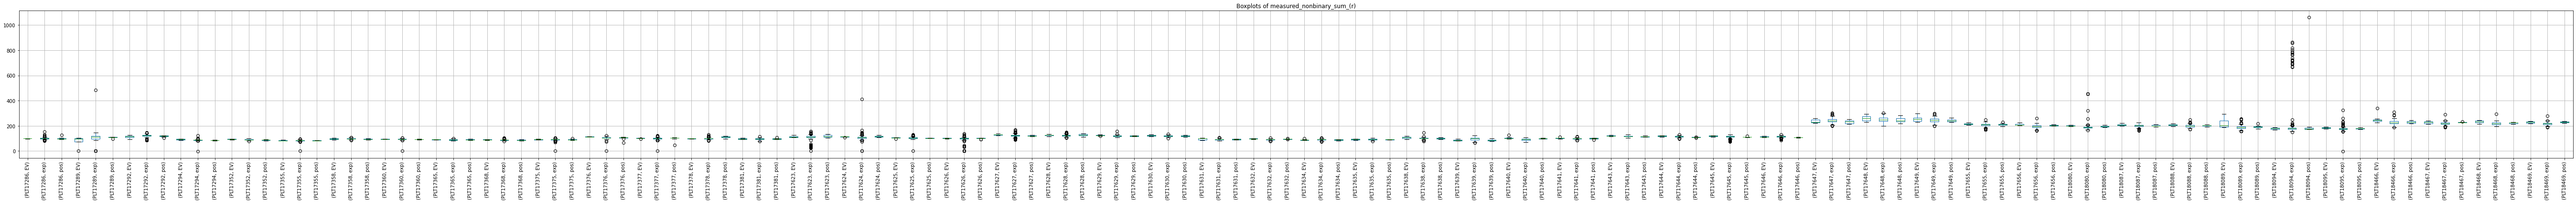

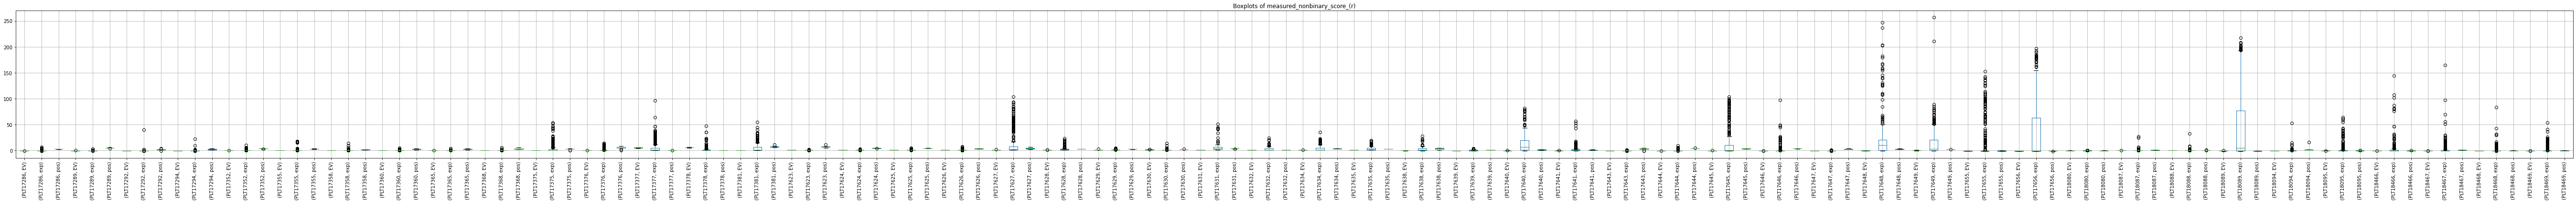

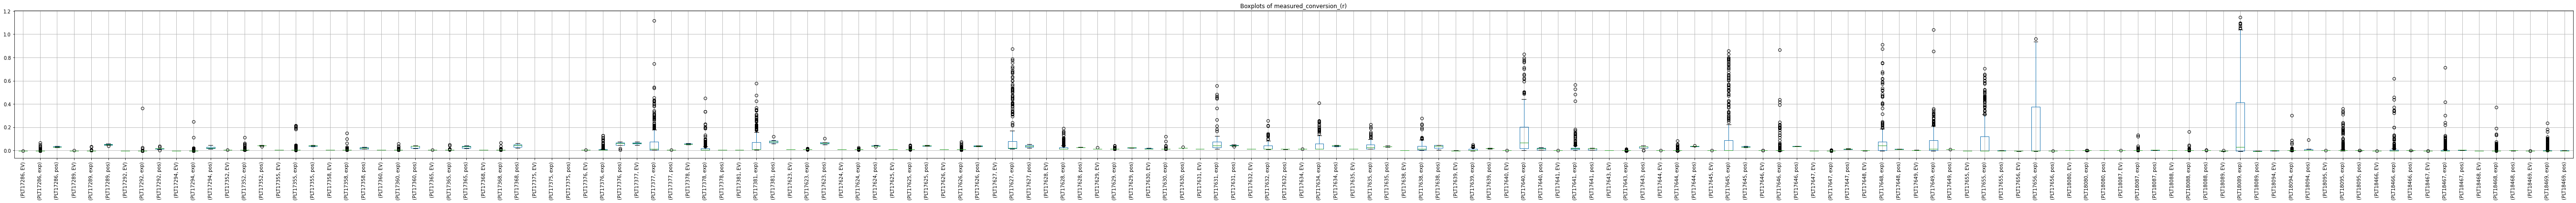

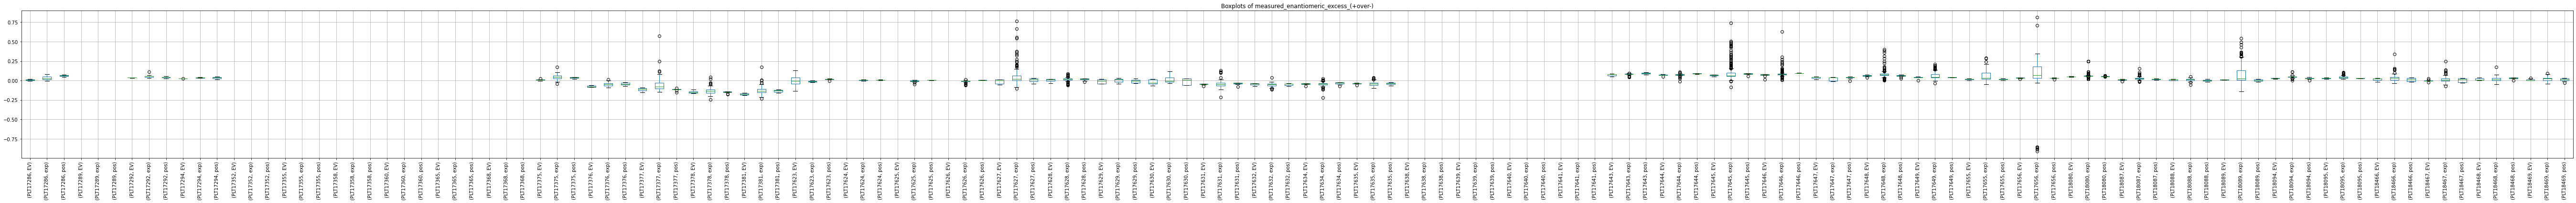

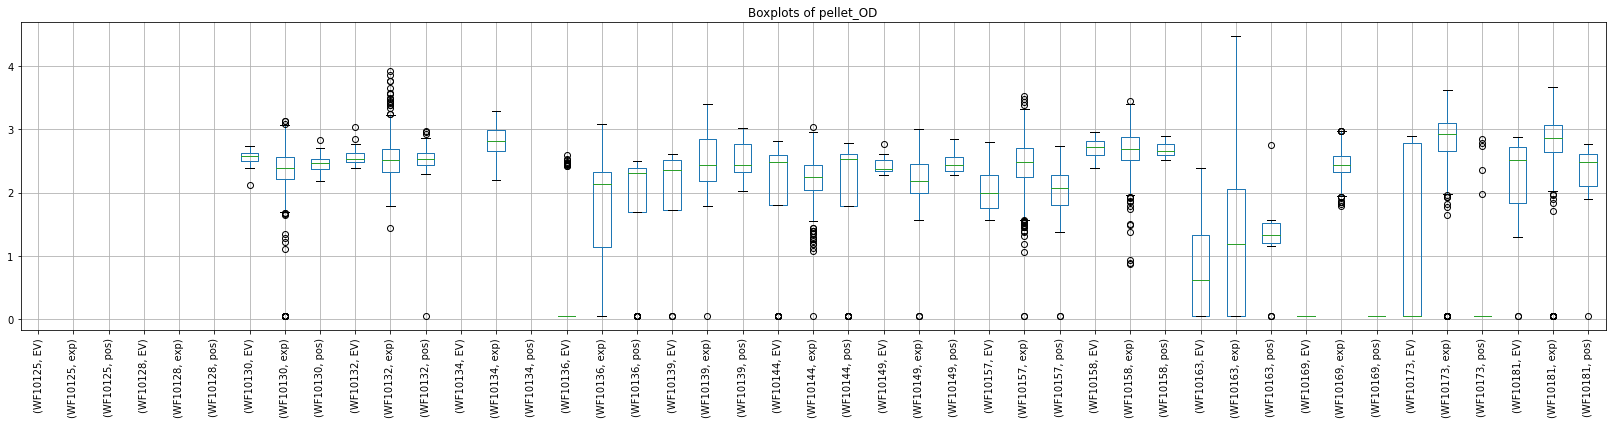

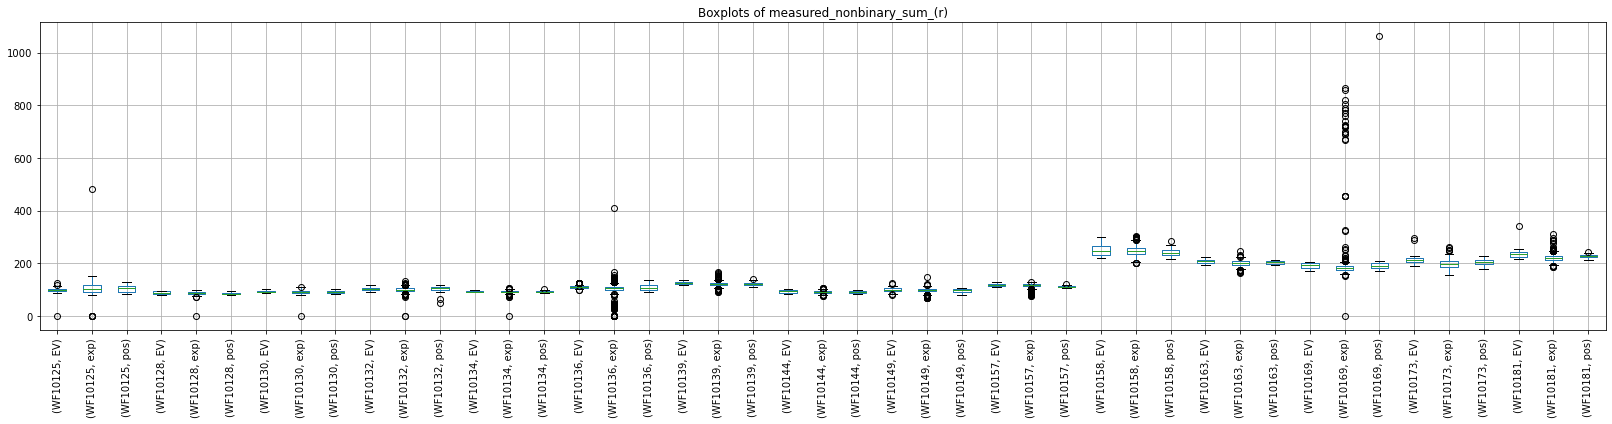

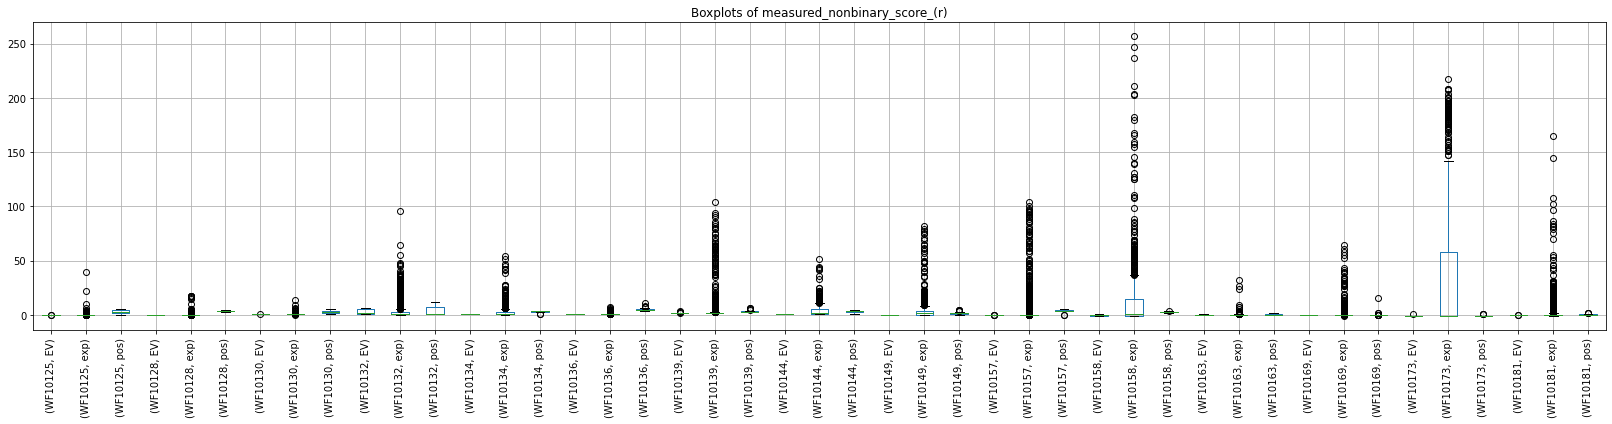

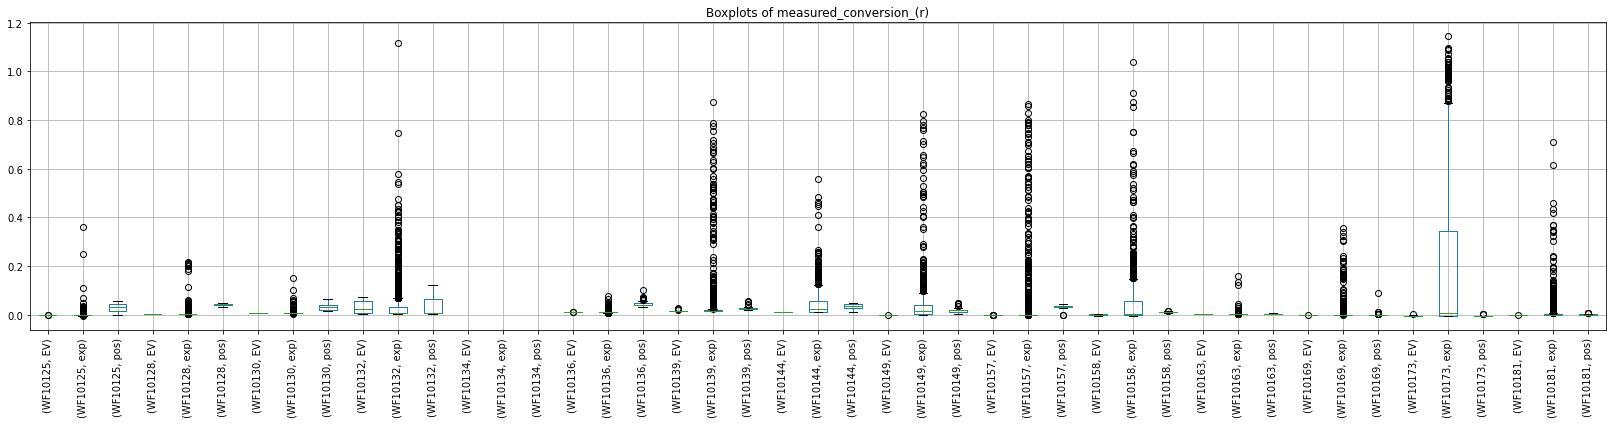

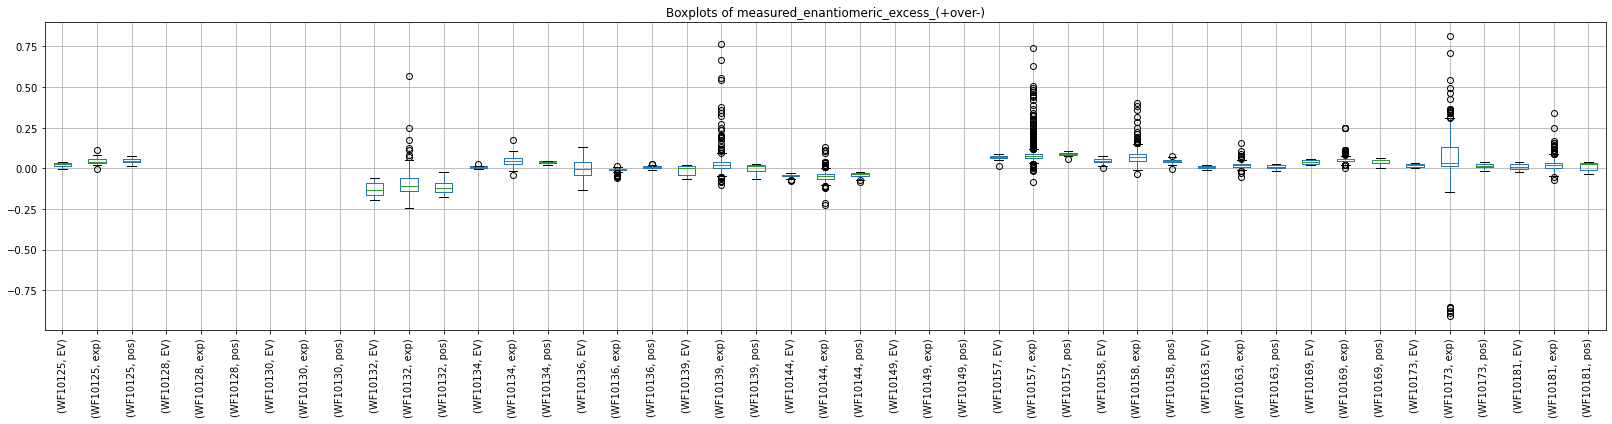

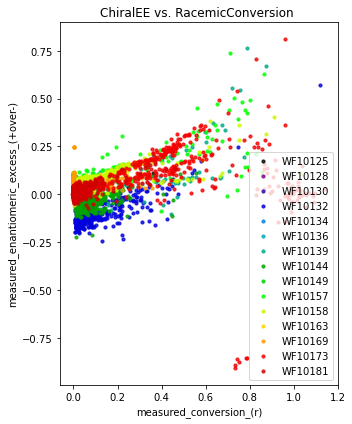

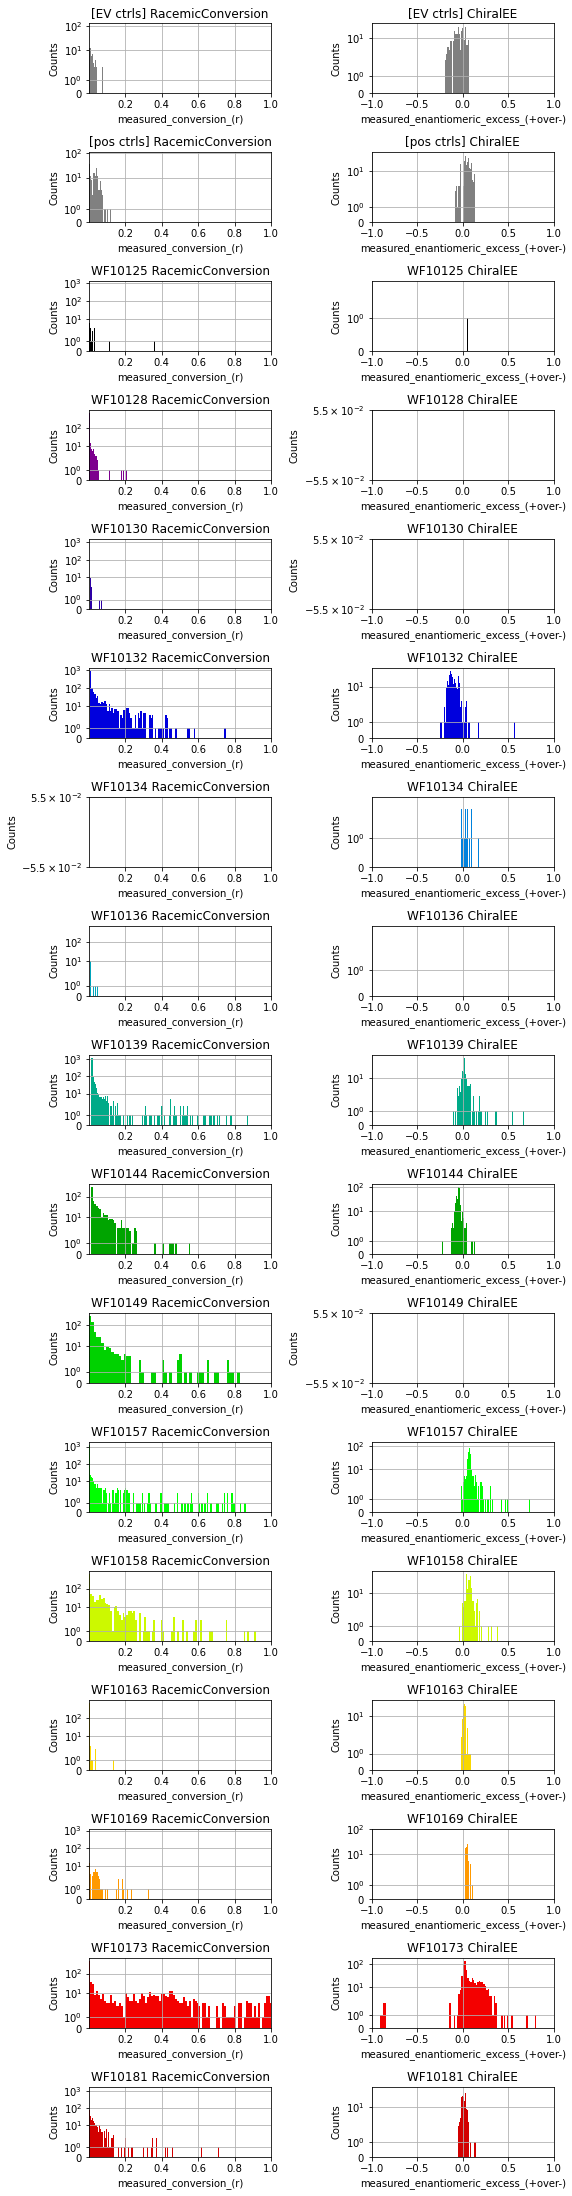

In [4]:
overall_analytics, overall_analytics_panel = analysis_pipeline.GET_OVERALL_ANALYTICS(df, display_table=True, plot_scatterplot=True, plot_histogram=True)
variant_analytics, variant_analytics_panel = analysis_pipeline.GET_VARIANT_ANALYTICS(df, display_table=True, plot_histogram=True)
top_variant_stats, top_variant_reps, top_variant_analytics_panel = analysis_pipeline.get_top_variants(
    variant_analytics, df, 
    thres_dict={'measured_conversion_(r)':(0.2,1,'median'), 'measured_enantiomeric_excess_(+over-)':(0.2,1,'median')}, 
    top_n_variants=100, sort_by=('measured_conversion_(r)', 'median'), 
    get_replicates_data=True
)
library_analytics, library_analytics_panel = analysis_pipeline.GET_LIBRARY_ANALYTICS(df, display_table=True, plot_histogram=True)
plate_analytics, plate_analytics_panel = analysis_pipeline.GET_PLATE_ANALYTICS(df, display_table=True)
unit_analytics, unit_analytics_panel = analysis_pipeline.GET_UNIT_ANALYTICS(df, display_table=True, plot_scatterplot=True, plot_histogram=True, get_ctrls_from_vals=True)

## Plot variant stats

/Users/charmaine/Documents/projects/ml-preprocessing/utils/visualization_utils.py:277: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_VAR-ONLY_RacemicProduct-MEAN_library_ref.png to S3.


/Users/charmaine/Documents/projects/ml-preprocessing/utils/visualization_utils.py:277: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_VAR-ONLY_RacemicProduct-MEDIAN_library_ref.png to S3.


/Users/charmaine/Documents/projects/ml-preprocessing/utils/visualization_utils.py:277: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_VAR-ONLY_RacemicProduct-STDEV_library_ref.png to S3.


/Users/charmaine/Documents/projects/ml-preprocessing/utils/visualization_utils.py:277: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_VAR-ONLY_RacemicProduct-CV_library_ref.png to S3.


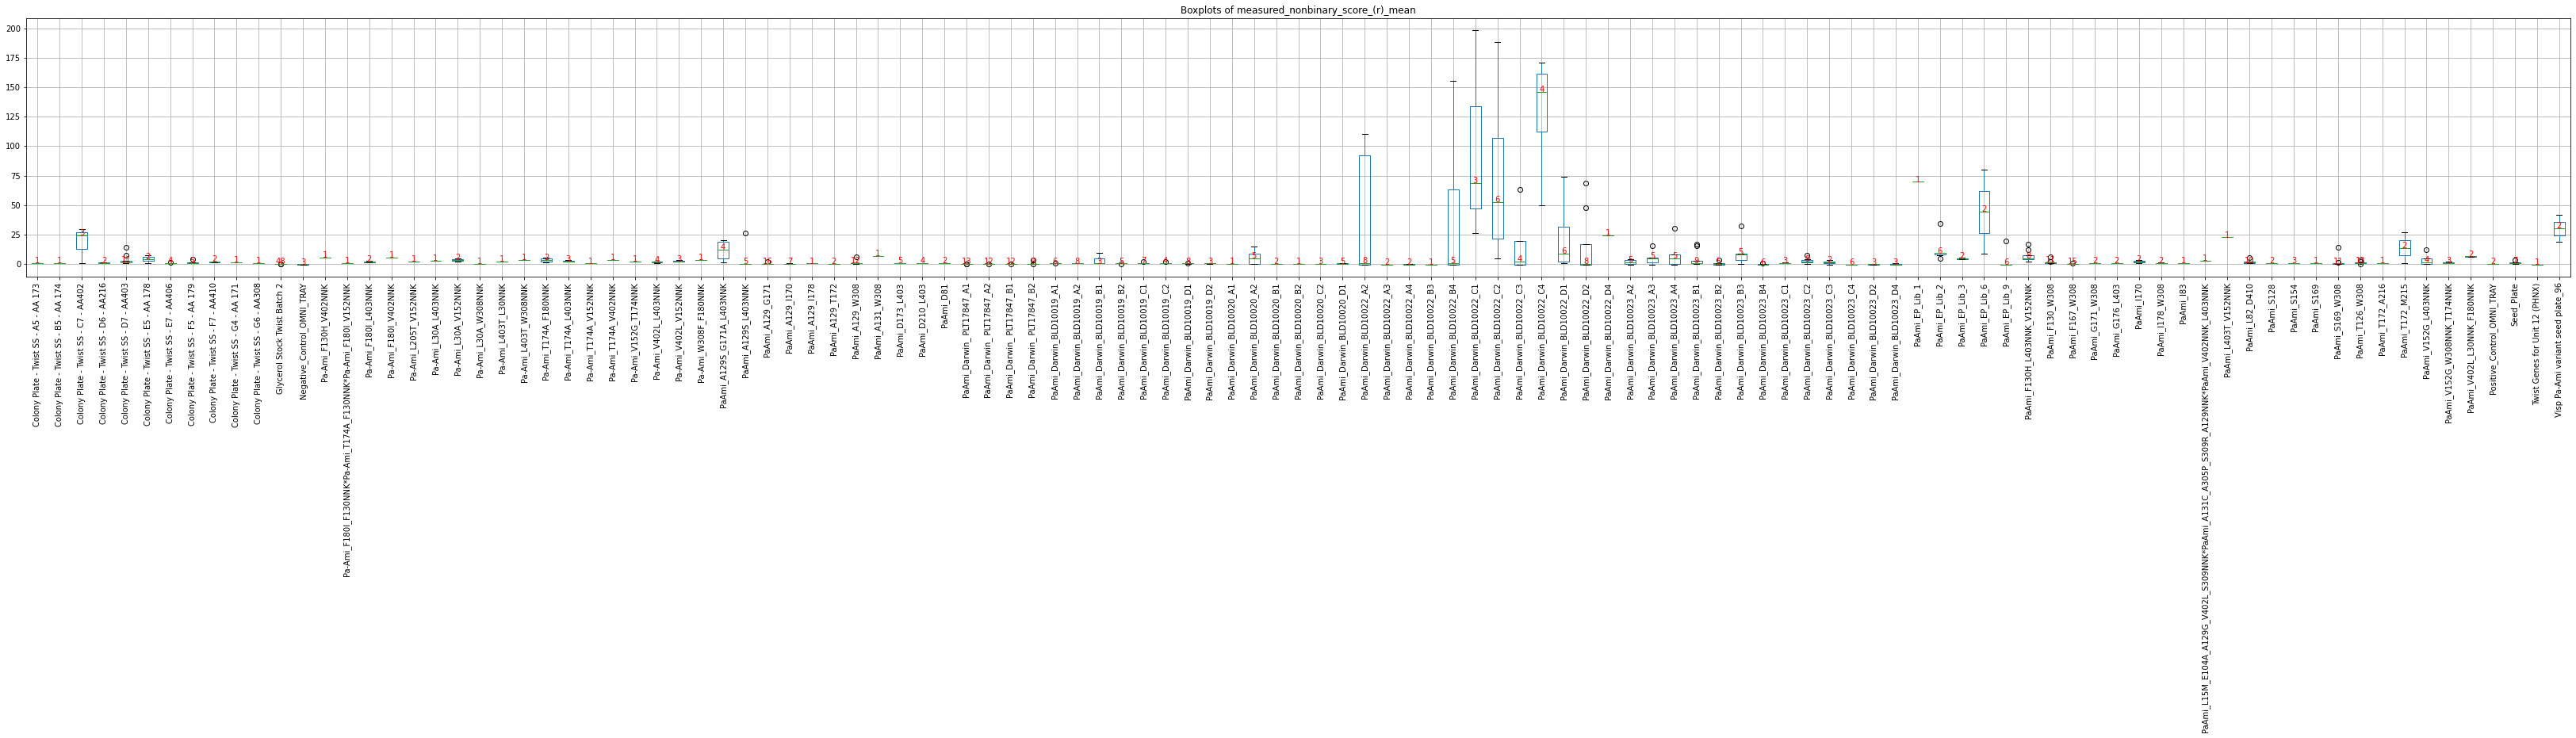

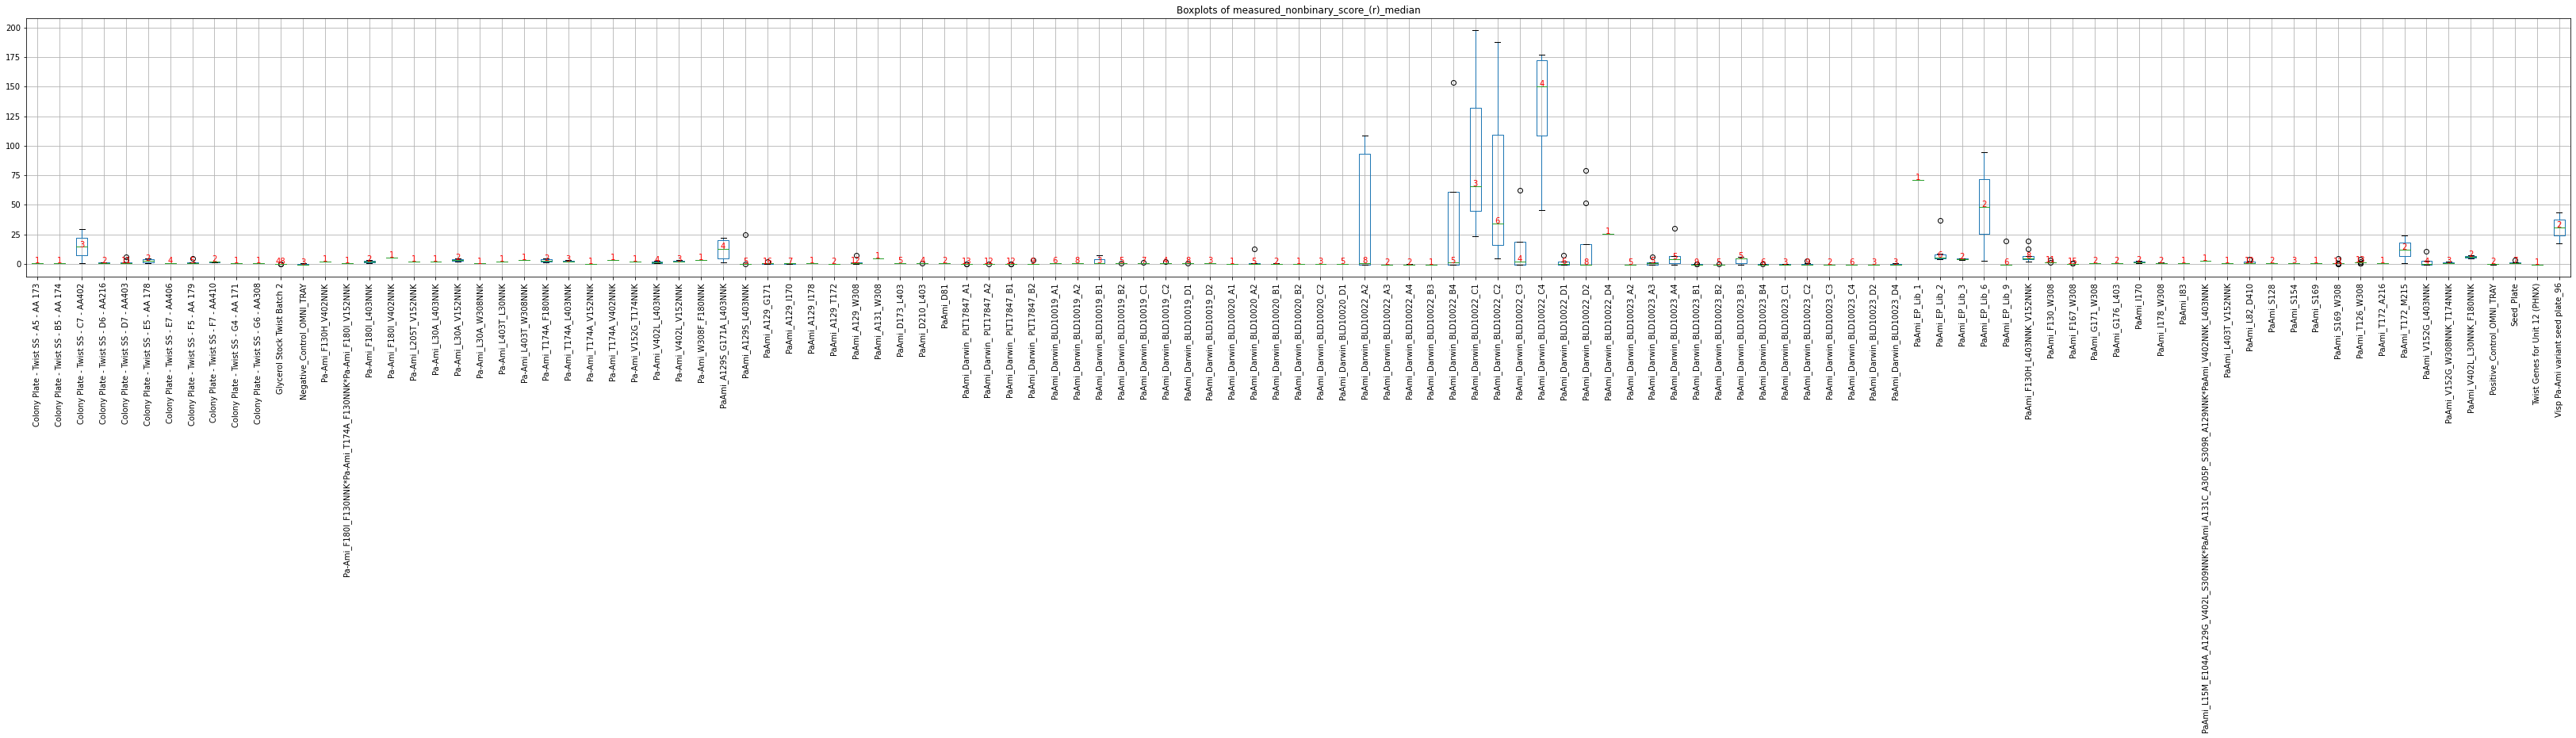

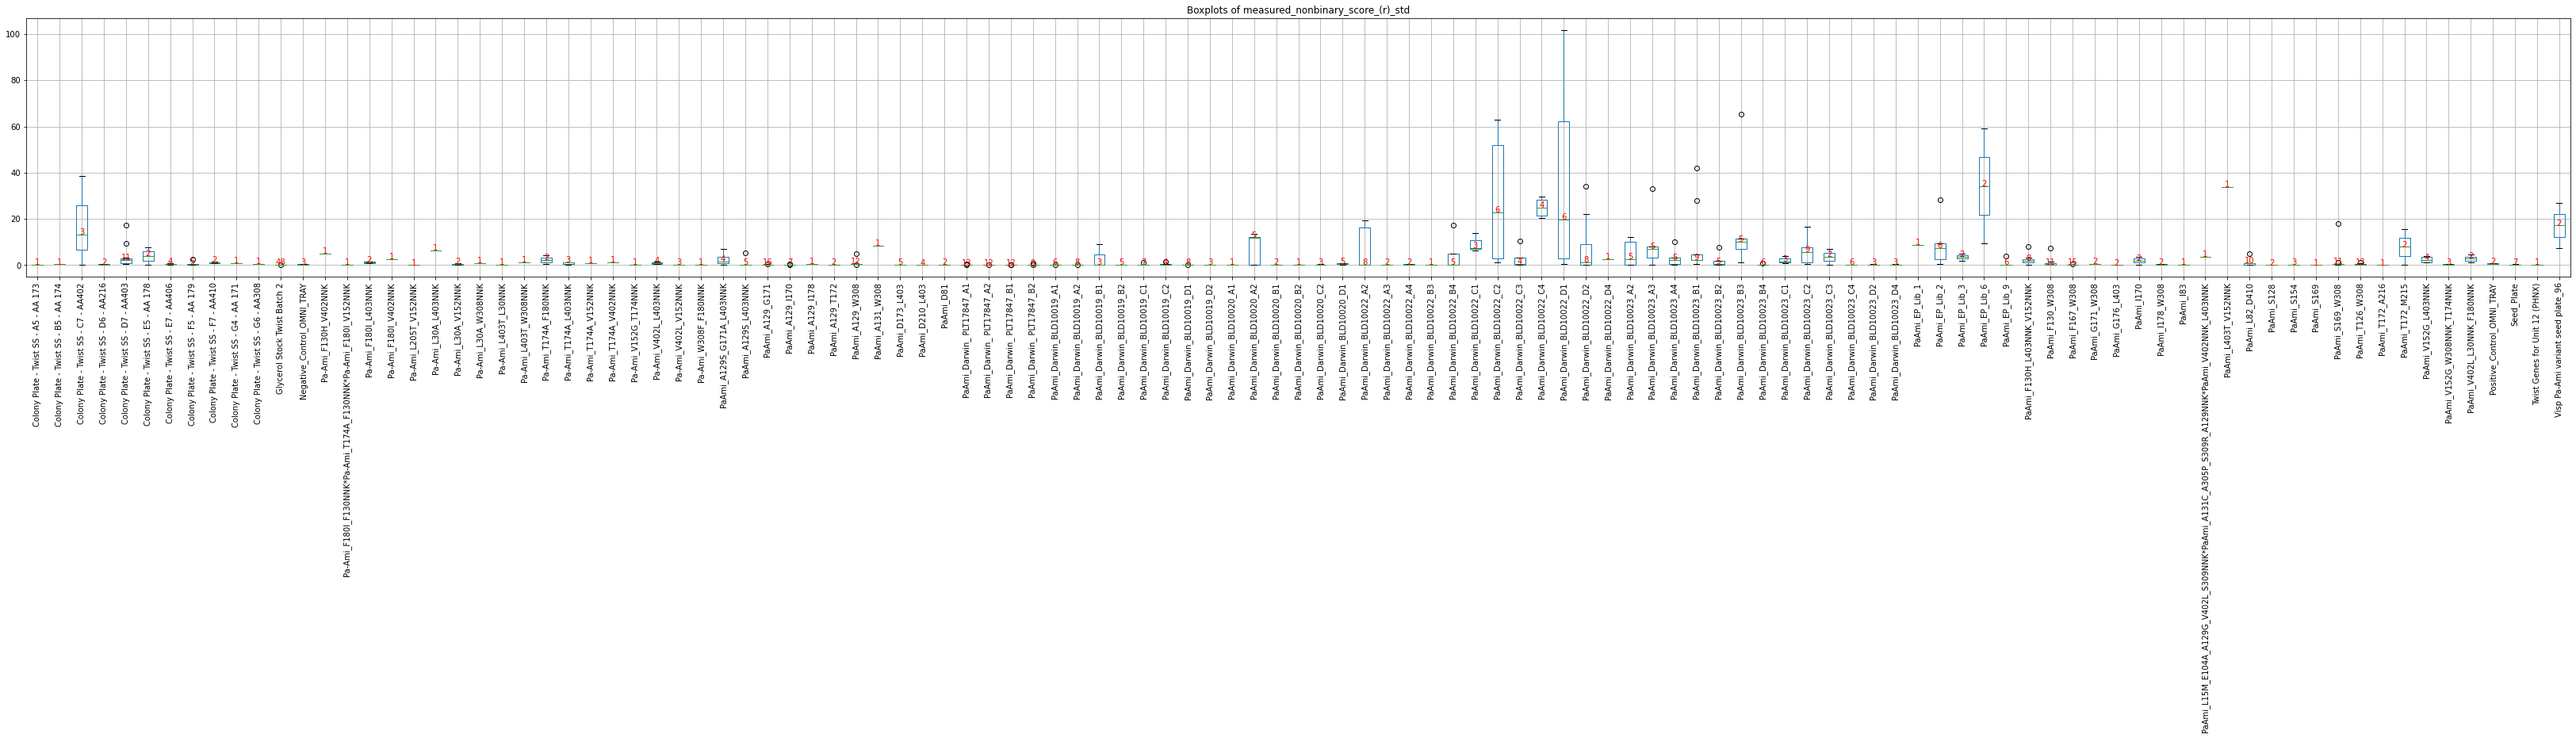

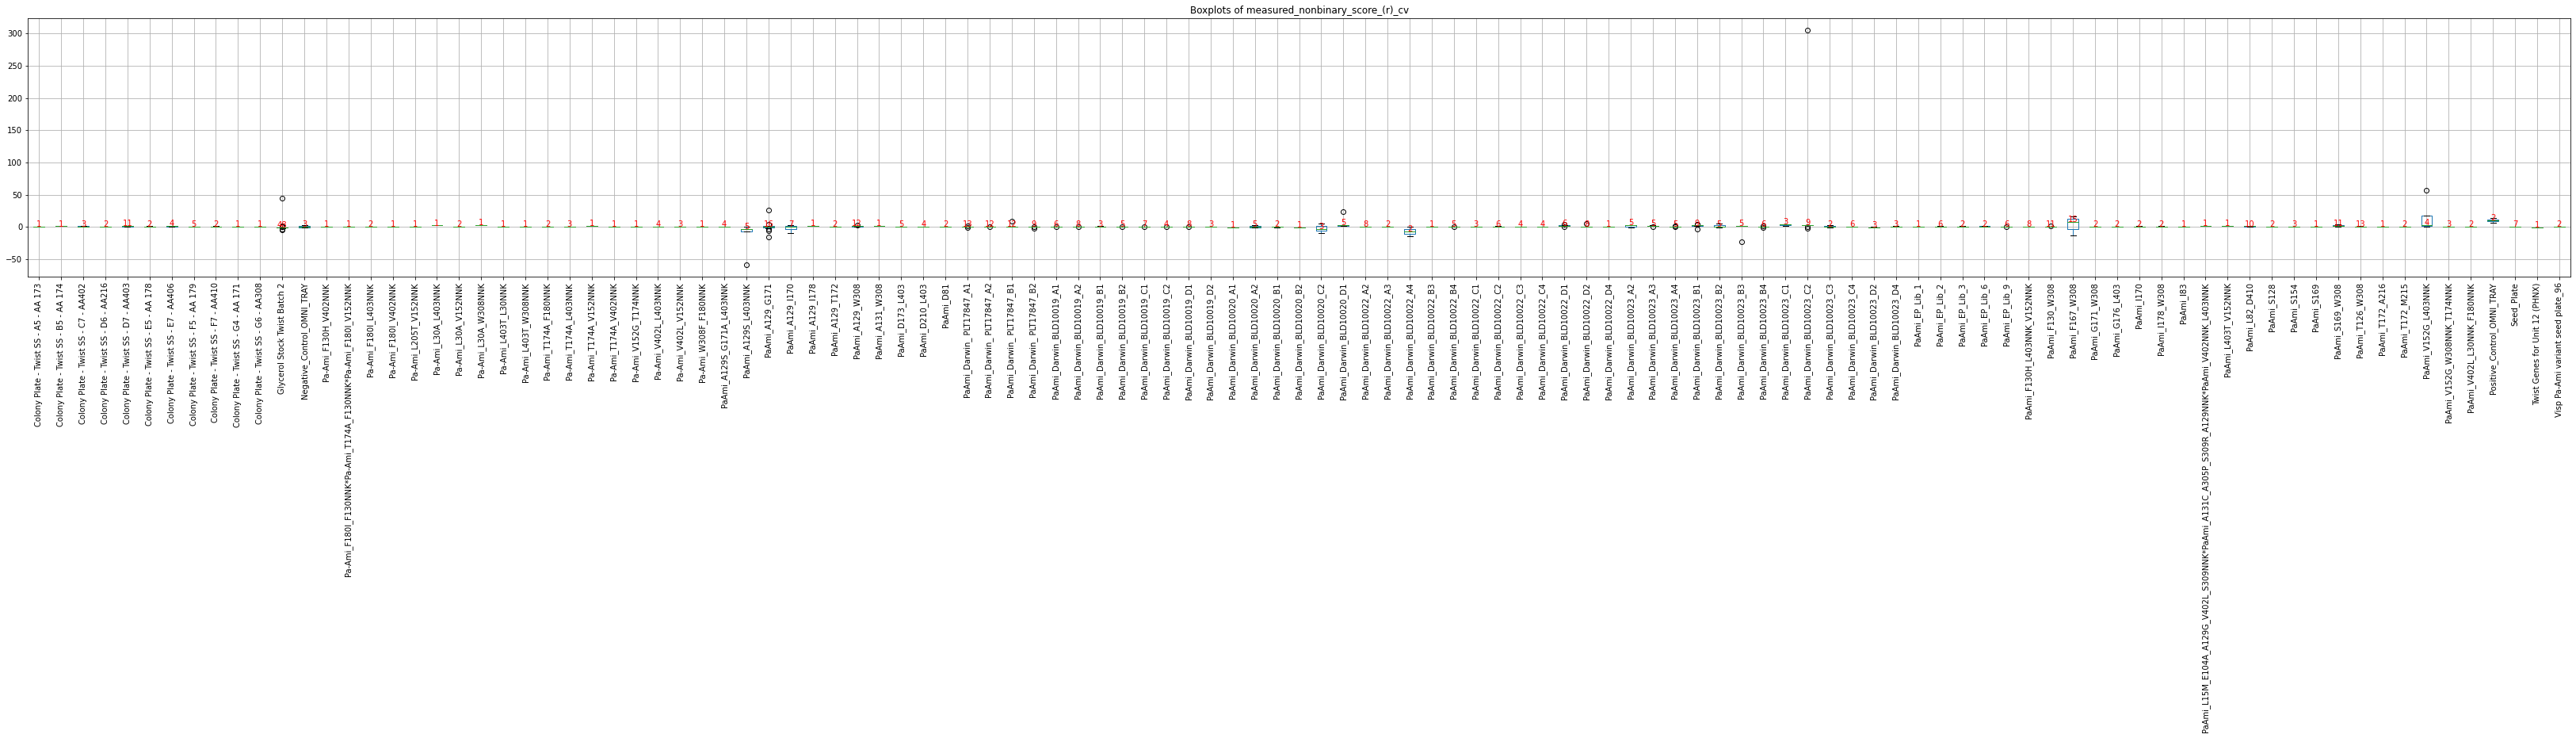

In [13]:
metric_list=['measured_nonbinary_score_(r)_mean', 'measured_nonbinary_score_(r)_median', 'measured_nonbinary_score_(r)_std', 'measured_nonbinary_score_(r)_cv']
metricname_list=['RacemicProduct-MEAN', 'RacemicProduct-MEDIAN', 'RacemicProduct-STDEV', 'RacemicProduct-CV']
groupby = 'library_ref' #'exp_workflow_barcode'

# get boxplots, split by enzyme variant
variant_analytics_noEV = variant_analytics.iloc[3:].copy()
variant_analytics_noEV = variant_analytics_noEV.loc[~variant_analytics_noEV.enzyme_barcode.isin(['DNA10001'])]
variant_analytics_noEV.loc[variant_analytics_noEV['substrate_concentration_(r)']>300, 'substrate_concentration_(r)'] = 308
variant_analytics_noEV = variant_analytics_noEV.loc[variant_analytics_noEV['n_LcmsC18'] > 4]
variant_analytics_noEV = variant_analytics_noEV.sort_values(by=groupby)

for i, (metric, metricname) in enumerate(zip(metric_list, metricname_list)):
    boxplot_activity_corr_list = analysis_pipeline.get_activity_correlation_boxplots(
        variant_analytics_noEV, 
        metric_list=[metric],
        metricname_list=[metricname],
        groupby=[groupby], # 'substrate_concentration_(r)'
        fname_prefix='VAR-ONLY_'
    )

## Get additional visualizations

Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_RacemicProduct_mutations.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_PelletOD_mutations.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/BOXPLOT_RacemicSum_mutations.png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-PelletOD_mutations
(all var).png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-PelletOD_ctrl_type
[V152A_L403T].png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-PelletOD_ctrl_type
[V152G].png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-PelletOD_ctrl_type
[A129S_G171A].png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-PelletOD_c

/Users/charmaine/Documents/projects/ml-preprocessing/utils/visualization_utils.py:326: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,5*aspect_ratio))


Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-RacemicSum_ctrl_type
[L82G_S128G_V152A_L209N_L403T].png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-RacemicSum_ctrl_type
[A129S_V152A_S309M_L403T].png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-RacemicSum_ctrl_type
[S128G_V152A_W386M_L403T].png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-RacemicSum_ctrl_type
[A129S_V152A_S309K_V402A_L403T].png to S3.
Saved Phoenix-prod_Unit2-3-4-5-6-7-8-9-10-11-12-13-14-15-16_LCMSONLY/SCATTERPLOT_RacemicProduct-vs-RacemicSum_ctrl_type
[A129S_V152A_S309K_L403T_S407V].png to S3.


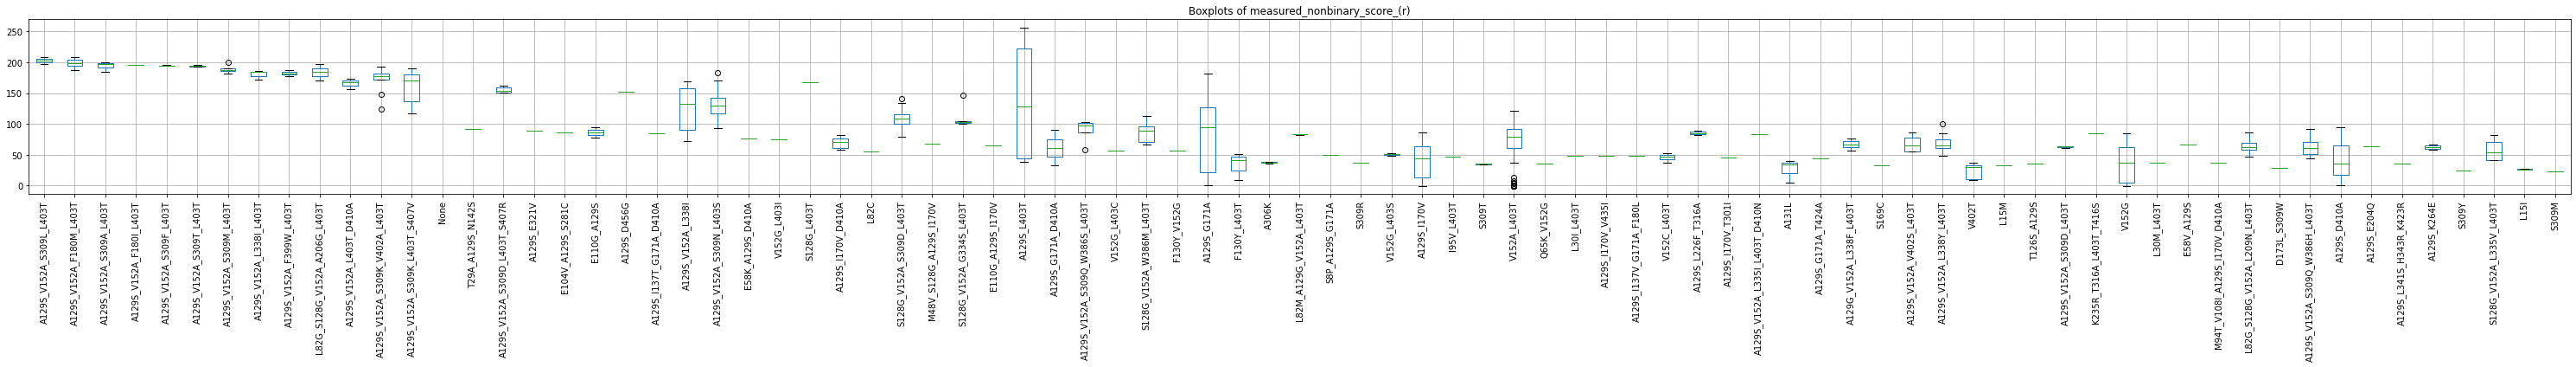

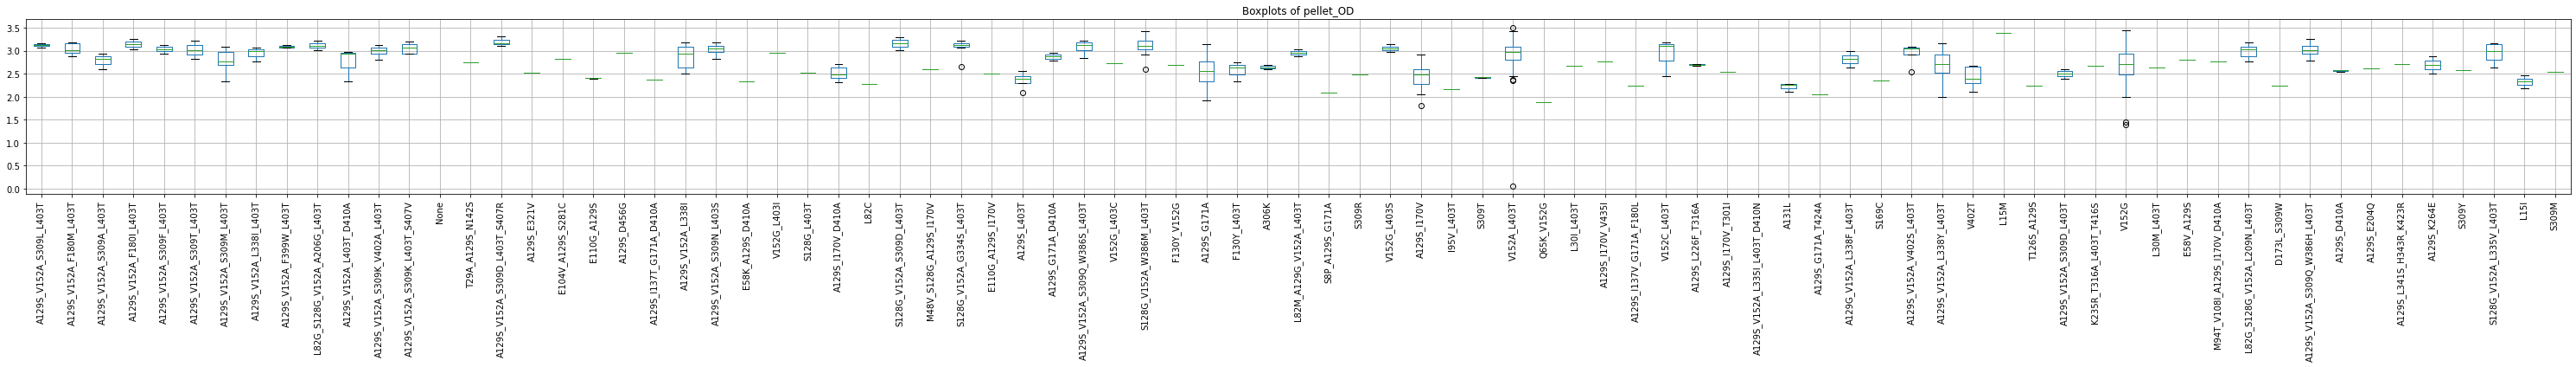

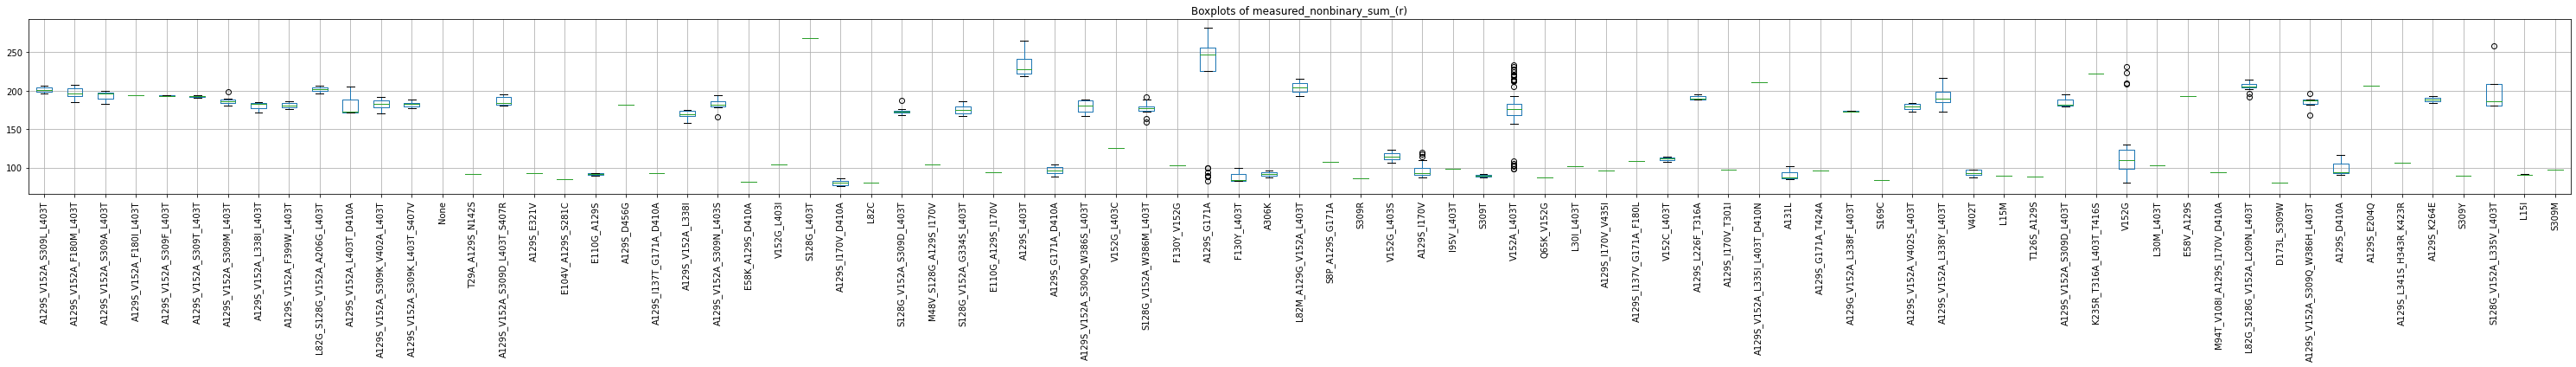

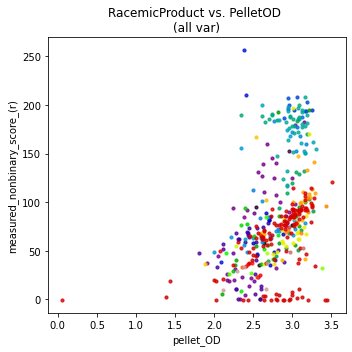

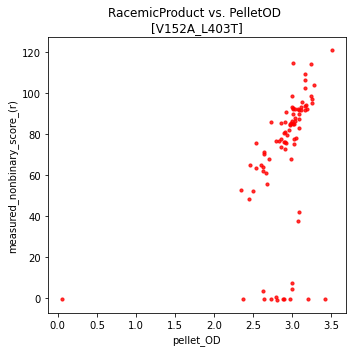

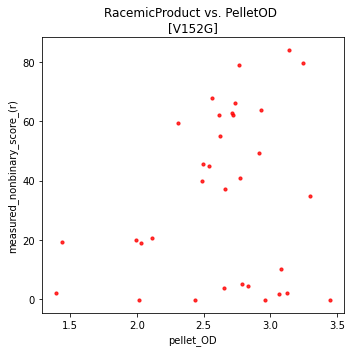

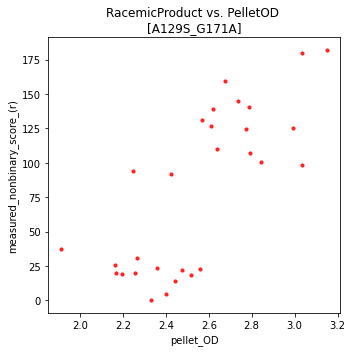

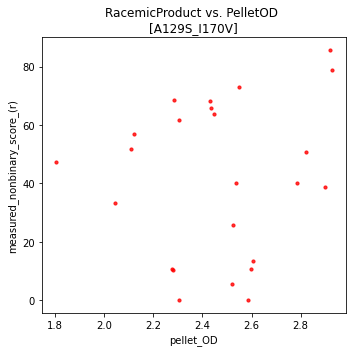

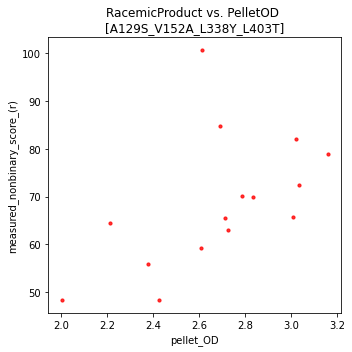

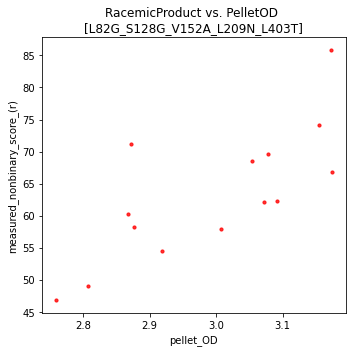

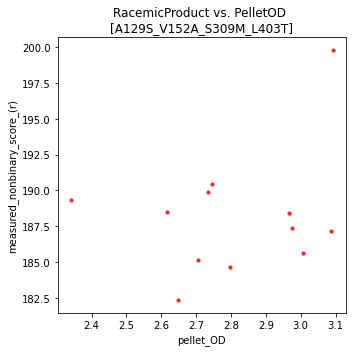

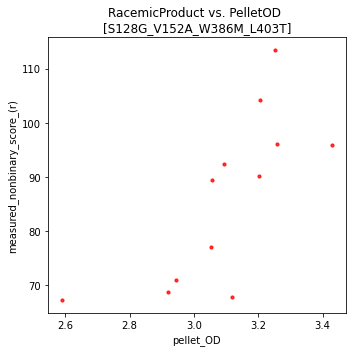

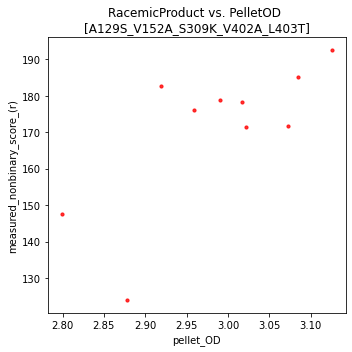

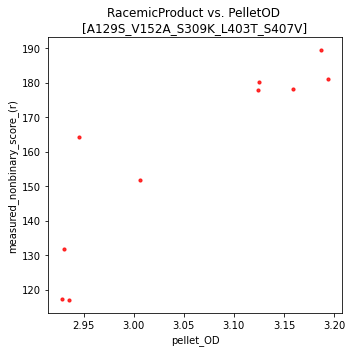

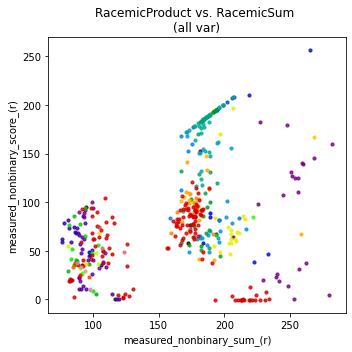

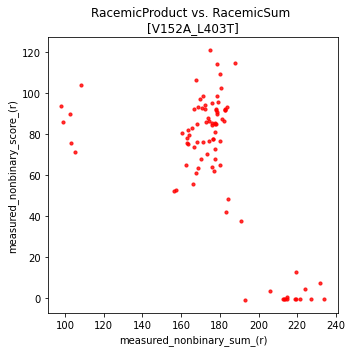

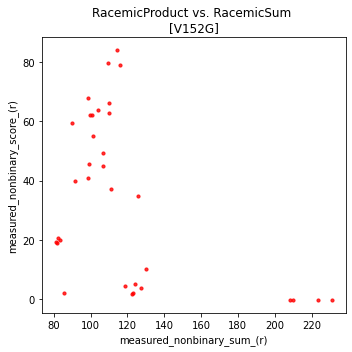

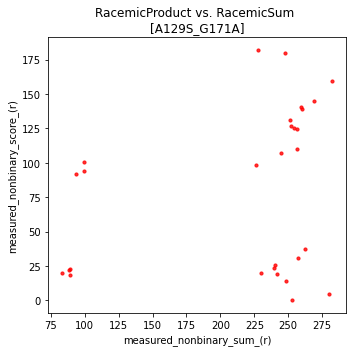

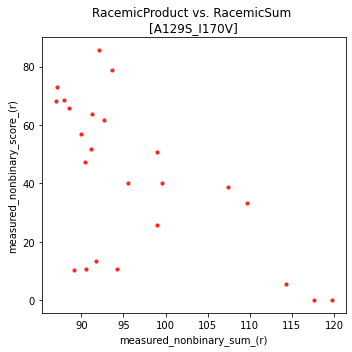

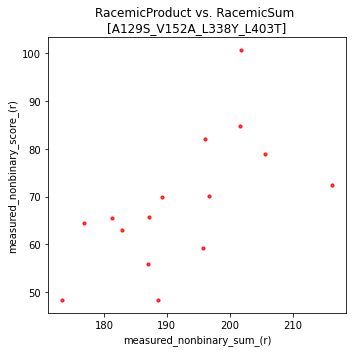

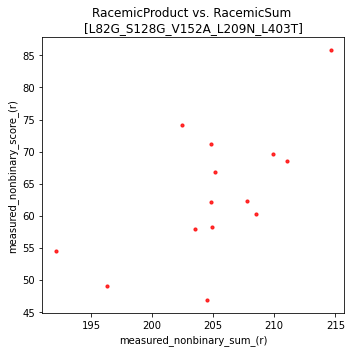

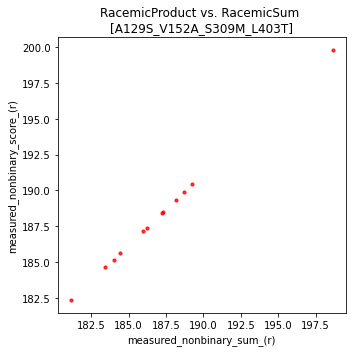

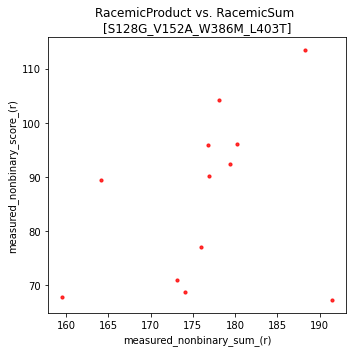

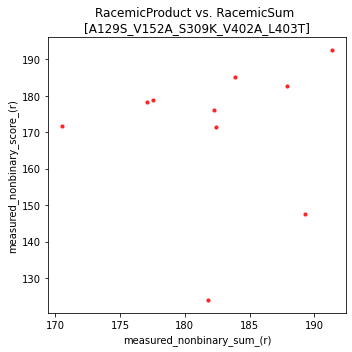

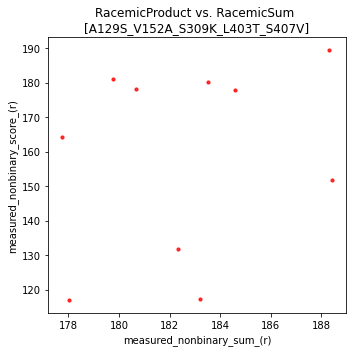

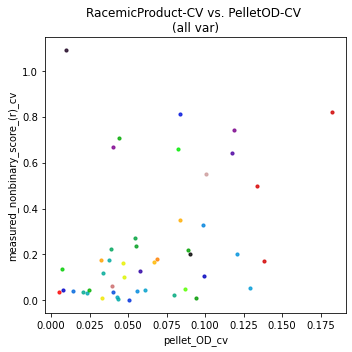

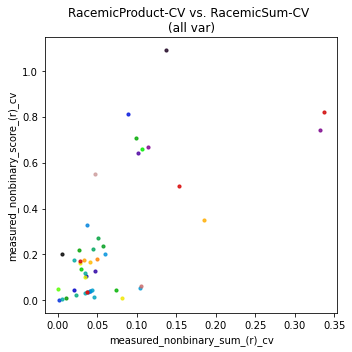

In [5]:
metric_list = ['measured_nonbinary_score_(r)', 'pellet_OD', 'measured_nonbinary_sum_(r)']
metricname_list=['RacemicProduct', 'PelletOD', 'RacemicSum']

if top_variant_reps is not None and top_variant_stats is not None:
    # get boxplots for activity for each variant
    boxplot_activity_corr_list = analysis_pipeline.get_activity_correlation_boxplots(top_variant_reps, metric_list=metric_list, metricname_list=metricname_list, groupby=['mutations'], table_suffix='\n(all var)')

    scatterplot_activity_corr_lists = {}
    for metric, metricname in zip(metric_list[1:], metricname_list[1:]):

        # get scatter plot of activity for all variants
        scatterplot_activity_corr_list_ALL = analysis_pipeline.get_activity_correlation_scatterplots(top_variant_reps, xmetric_list=[metric], xmetricname_list=[metricname], ymetric=metric_list[0], ymetricname=metricname_list[0], groupby='mutations', table_suffix='\n(all var)')

        # get scatter plots for each variant
        scatterplot_activity_corr_list_VARS = []
        var_to_plot = top_variant_stats.sort_values(by=['n_LcmsC18', 'measured_conversion_(r)_median'], ascending=False).mutations.tolist()[:10]
        for var in var_to_plot:
            var_reps = top_variant_reps.loc[top_variant_reps.mutations==var]
            scatterplot_activity_corr_list_VAR = analysis_pipeline.get_activity_correlation_scatterplots(var_reps, xmetric_list=[metric], xmetricname_list=[metricname], ymetric=metric_list[0], ymetricname=metricname_list[0], groupby='ctrl_type', table_suffix=f'\n[{var}]')
            scatterplot_activity_corr_list_VARS += scatterplot_activity_corr_list_VAR

        # update fig list
        scatterplot_activity_corr_lists[metricname] = scatterplot_activity_corr_list_ALL + scatterplot_activity_corr_list_VARS

    # get scatter plots of activity CV for all variants
    scatterplot_activityCV_corr_list = analysis_pipeline.get_activity_CV_correlation_scatterplots(top_variant_stats, xmetric_list=['pellet_OD_cv', 'measured_nonbinary_sum_(r)_cv'], xmetricname_list=['PelletOD-CV', 'RacemicSum-CV'], ymetric='measured_nonbinary_score_(r)_cv', ymetricname='RacemicProduct-CV', groupby='mutations', table_suffix='\n(all var)')

# Get Analytics Dashboard

In [140]:
# figure panel
if top_variant_reps is not None and top_variant_stats is not None:
    activity_boxplots = pn.Column(
        '# Boxplots of Activity, PelletOD & SumConc (by variant)', 
        *[pn.pane.Matplotlib(fig) for fig in boxplot_activity_corr_list], 
        background='White', scroll=True)
    
    gspec_dict = {metric: pn.GridSpec(sizing_mode='stretch_both', max_height=600) for metric in scatterplot_activity_corr_lists}
    n_plots = len(list(scatterplot_activity_corr_lists.values())[0])
    rows = 2
    cols = int(np.ceil(n_plots/2))
    count = 0
    while count < n_plots:
        i = int(np.floor(count/cols))
        j = int(count%cols)
        for metric in scatterplot_activity_corr_lists:
            gspec_dict[metric][i, j] = pn.pane.Matplotlib(scatterplot_activity_corr_lists[metric][count])
        count += 1
    
    activity_scatterplots = pn.Column(
        '# Scatter plots of Activity VS. PelletOD (by sample)', 
        gspec_dict['PelletOD'], 
        '# Scatter plots of Activity VS. SumConc (by sample)', 
        gspec_dict['RacemicSum'], 
        background='White', scroll=True)

    activityCV_scatterplots = pn.Column(
        '# Scatter plots of Activity CV VS. PelletOD CV & SumConc CV (by variant)', 
        pn.Row(*[pn.pane.Matplotlib(fig) for fig in scatterplot_activityCV_corr_list]), 
        background='White', scroll=True)

    figure_panel = [activity_boxplots, activity_scatterplots, activityCV_scatterplots]

In [ ]:
analytics_panel = overall_analytics_panel + variant_analytics_panel + top_variant_analytics_panel + top_variant_analytics_panel + figure_panel + plate_analytics_panel + library_analytics_panel + unit_analytics_panel
# analytics_panel = figure_panel
pn.template.FastListTemplate(
    site="Panel", 
    title="PHNX Production Analytics", 
    main=analytics_panel, 
    main_max_width="1760px",
).servable();

# Additional Manual Analysis